## **The Impact of Discount Presentation Formats on Consumer Purchasing Behavior: An Empirical Investigation**

  
> Team member: Ya-Chu Hsu, Yu-Fang Liao, Yu-Chin Chen, Yi-Cheng Chung, Chih-Hsin Peng (Group23)

# Data pre-processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Delete the warning
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
# drive.mount('/content/drive')
#df = pd.read_excel('/content/drive/MyDrive/Copy of survey.xlsx')
df = pd.read_excel('/content/survey.xlsx')
#df = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/BA830_experimentation/project /survey.xlsx')

In [ ]:
df_preprocess = df.drop([0, 1])
df_preprocess.rename(columns = {'Q17':'Q2'},inplace=True)
df_preprocess = df_preprocess.fillna(0)
df_preprocess = df_preprocess[df_preprocess['Finished'] == True]

# drop non-use columns
df_preprocess.drop(['Status','IPAddress', 'Progress','Finished','RecordedDate', 'ResponseId', 'UserLanguage',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference','DistributionChannel','Q_RelevantIDDuplicate','Q_RelevantIDDuplicateScore','Q_RelevantIDFraudScore',
       'Q_RelevantIDLastStartDate'],axis=1,inplace=True)
df_preprocess = df_preprocess.reset_index()
df_preprocess.drop('index',axis=1,inplace=True)
df_preprocess.head()

,StartDate,EndDate,Duration (in seconds),LocationLatitude,LocationLongitude,country,Gender,Age,Career,Monthly Expense,...,Q8_DO_4,Q8_DO_5,Q9,Q9_filter,Q9_DO_1,Q9_DO_2,Q9_DO_3,Q9_DO_4,Q9_DO_5,Q10
0,2024-02-27 19:04:41,2024-02-27 19:06:36,115,42.3973,-71.0372,United States of America,Female,18-24 years old,Student,$601~$900,...,0,0,$550 $495 \n (save 10%),5.0,1,2,0,0,3,jhongzy@bu.edu
1,2024-02-27 19:05:40,2024-02-27 19:06:58,78,42.3562,-71.0631,United States of America,Male,18-24 years old,Student,"$1,801~$2,100",...,0,3,500,1.0,1,2,3,0,0,Please pick me
2,2024-02-27 19:10:43,2024-02-27 19:12:27,103,32.7908,-96.8336,United States of America,Female,25-34 years old,Student,"$1,201~$1,500",...,0,3,500,1.0,2,1,3,0,0,-99
3,2024-02-27 19:10:24,2024-02-27 19:12:48,143,42.3464,-71.0975,United States of America,Male,18-24 years old,Student,"$2,401~$2,700",...,3,0,$550 $495\n (save $55),4.0,1,2,0,3,0,Some of the items are pretty beautiful & somes...
4,2024-02-27 19:13:28,2024-02-27 19:16:12,164,42.2506,-71.1286,United States of America,Female,18-24 years old,Student,"$2,701~$3,000",...,0,0,$550 $495 \n (save 10%),5.0,1,2,0,0,3,-99


# Demographic

Q: How many survey do we collect in total?
- total: 202
- finished: 165
- unfinished: 37

In [ ]:
len(df_preprocess) # finished

165

## Country

In [ ]:
df_preprocess['country'].value_counts()

Taiwan                      76
United States of America    55
China                       20
Philippines                  4
Canada                       3
Indonesia                    2
India                        1
Germany                      1
Japan                        1
Hong Kong (S.A.R.)           1
France                       1
Name: country, dtype: int64

In [ ]:
import plotly.graph_objects as go

counts = df_preprocess['country'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])
fig.update_layout(title='Distribution of Country',title_x=0.5)
fig.show()

## Gender

In [ ]:
df_preprocess['Gender'].value_counts()

Female         106
Male            58
Genderqueer      1
Name: Gender, dtype: int64

In [ ]:
import plotly.graph_objects as go

counts = df_preprocess['Gender'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])
fig.update_layout(title='Distribution of Gender',title_x=0.5)
fig.show()

## Age

In [ ]:
df_preprocess['Age'].value_counts()

18-24 years old    73
25-34 years old    72
45-54 years old    10
55-64 years old     5
35-44 years old     5
Name: Age, dtype: int64

In [ ]:
import plotly.graph_objects as go

counts = df_preprocess['Age'].value_counts()

fig = go.Figure(data=[go.Bar(x=counts.index, y=counts.values)])
fig.update_layout(title='Distribution of Age', title_x=0.5, xaxis_title='Age', yaxis_title='Count')
fig.show()

## Career

In [ ]:
df_preprocess['Career'].value_counts()

Student                                               66
Information Technology (IT) and Telecommunications    26
Education                                             20
Other                                                 11
Professional, Scientific, and Technical Services       9
Marketing, Advertising, and Public Relations           8
Healthcare and Social Assistance                       6
Unemployed                                             6
Manufacturing                                          5
Arts, Entertainment, and Recreation                    2
Energy and Utilities                                   2
Retail Trade                                           2
Government and Public Administration                   1
Wholesale Trade                                        1
Name: Career, dtype: int64

In [ ]:
import plotly.graph_objects as go

counts = df_preprocess['Career'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])
fig.update_layout(title='Distribution of Career',title_x=0.5)
fig.show()

## Monthly Expense

In [ ]:
df_preprocess['Monthly Expense'].value_counts()

$301~$600        35
Above $3,000     21
$601~$900        20
$1,201~$1,500    19
$901~$1,200      19
$0~$300          17
$1,501~$1,800    14
$2,701~$3,000     7
$1,801~$2,100     6
$2,401~$2,700     5
$2,101~$2,400     2
Name: Monthly Expense, dtype: int64

In [ ]:
import plotly.graph_objects as go

counts = df_preprocess['Monthly Expense'].value_counts()

fig = go.Figure(data=[go.Bar(x=['0~300','301~600', '601~900','901~1,200','1,201~1,500','1,501~1,800','1,801~2,100', '2,101~2,400','2,401~2,700', '2,701~3,000','Above 3,000']
                             , y=[17,35,20,19,19,14,6,2,5,7,21])])
fig.update_layout(title='Distribution of Monthly Expense', title_x=0.5, xaxis_title='Monthly Expense ($)', yaxis_title='Count')

# Randomize Properly?

In [ ]:
# Clean the groups (control, T1, and T2)
def assign_group(row, col_suffix):
    if row[f'Q{col_suffix}_DO_3'] == 3:
        return 'control'
    elif row[f'Q{col_suffix}_DO_4'] == 3:
        return 'T1'
    elif row[f'Q{col_suffix}_DO_5'] == 3:
        return 'T2'
    else:
        return None

for i in range(1, 10):
    col_suffix = f'Q{i}'
    df_preprocess[f'{col_suffix}_group'] = df_preprocess.apply(lambda row: assign_group(row, i), axis=1)

display(df_preprocess.head(3))

,StartDate,EndDate,Duration (in seconds),LocationLatitude,LocationLongitude,country,Gender,Age,Career,Monthly Expense,...,Q10,Q1_group,Q2_group,Q3_group,Q4_group,Q5_group,Q6_group,Q7_group,Q8_group,Q9_group
0,2024-02-27 19:04:41,2024-02-27 19:06:36,115,42.3973,-71.0372,United States of America,Female,18-24 years old,Student,$601~$900,...,jhongzy@bu.edu,control,T2,T1,T2,T2,control,T1,control,T2
1,2024-02-27 19:05:40,2024-02-27 19:06:58,78,42.3562,-71.0631,United States of America,Male,18-24 years old,Student,"$1,801~$2,100",...,Please pick me,T2,control,T2,control,T1,T2,control,T2,control
2,2024-02-27 19:10:43,2024-02-27 19:12:27,103,32.7908,-96.8336,United States of America,Female,25-34 years old,Student,"$1,201~$1,500",...,-99,T1,control,control,T2,control,control,T2,T2,control


In [ ]:
"""
 Q1: Is our survey properly randomized?
 Answer1 : To see the counts in each Q, see the distribution of control, T1, and T2
           we know each person(each row) is been assign to control, T1, or T2 by seeing [Q1_group ~ Q2 group]
"""

group_list = ['Q1_group','Q2_group','Q3_group','Q4_group','Q5_group','Q6_group','Q7_group','Q8_group','Q9_group']

for group in group_list:
  each_q_group_distribution = df_preprocess[group].value_counts()
  print(group,"distribution:")
  display(each_q_group_distribution)
  print('\n')

# the outcome shows: ppl we assign to three group are randomized (ppl counts are similar)

Q1_group distribution:


T1         57
T2         56
control    52
Name: Q1_group, dtype: int64



Q2_group distribution:


T2         56
T1         56
control    53
Name: Q2_group, dtype: int64



Q3_group distribution:


T2         56
control    56
T1         53
Name: Q3_group, dtype: int64



Q4_group distribution:


T2         56
control    55
T1         54
Name: Q4_group, dtype: int64



Q5_group distribution:


T1         56
control    55
T2         54
Name: Q5_group, dtype: int64



Q6_group distribution:


control    56
T1         55
T2         54
Name: Q6_group, dtype: int64



Q7_group distribution:


T1         56
T2         55
control    54
Name: Q7_group, dtype: int64



Q8_group distribution:


control    55
T2         55
T1         55
Name: Q8_group, dtype: int64



Q9_group distribution:


T1         56
T2         55
control    54
Name: Q9_group, dtype: int64

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

for i in range(1, 10):
    control_count = (df_preprocess[f'Q{i}_group'] == 'control').sum()
    treatment1_count = (df_preprocess[f'Q{i}_group'] == 'T1').sum()
    treatment2_count = (df_preprocess[f'Q{i}_group'] == 'T2').sum()

    control_prop = control_count / 165
    treatment1_prop = treatment1_count / 165
    treatment2_prop = treatment2_count / 165

    stat1, pval1 = proportions_ztest([control_count, treatment1_count], [165, 165])
    stat2, pval2 = proportions_ztest([control_count, treatment2_count], [165, 165])
    stat3, pval3 = proportions_ztest([treatment1_count, treatment2_count], [165, 165])

    if pval1 > 0.05 and pval2 > 0.05 and pval3 > 0.05:
        print(f"For question Q{i}, the result is properly randomized.")
    else:
        print(f"For question Q{i}, the result is not properly randomized.")

For question Q1, the result is properly randomized.
For question Q2, the result is properly randomized.
For question Q3, the result is properly randomized.
For question Q4, the result is properly randomized.
For question Q5, the result is properly randomized.
For question Q6, the result is properly randomized.
For question Q7, the result is properly randomized.
For question Q8, the result is properly randomized.
For question Q9, the result is properly randomized.


# Treatment effect

## ATE

In [ ]:
# Q1 we have five price: $6 $5-2 $5-3 $5($0.25)  $5(5%)
# make it easy to groupby so we change them into the same format
                # : change two fixed shown price to 1 & 2, control price-> 3, T1($)-> 4, T2(%)-> 5

# purpose: purely seeing each Q1's each price choice's count to see it's portion
# e.g. 重點是在看多少人選擇看, 不是在看各個組的人到底選了哪個選項 -> 確保survey randomize就好
# count = how many ppl choose price 1, price 2, control, t1, t2
# porportion = change count to percentage

In [ ]:
result2 = []
filter_list = ['Q1_filter', 'Q2_filter', 'Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

for filter in filter_list:                # == count
  result = df_preprocess.groupby(by=filter).size().reset_index(name='count')
  result['proportion'] = result['count'] / result['count'].sum()
  result = pd.DataFrame(result)
  result2.append(result)

#result2

In [ ]:
# see the ATE in each Q: count => (4-3) - (5-3) = 4-3-5+3 = 4-5
# if T1 > T2 = diff > 0 -> $ affect more than %
# if T2 > T1 = diff < 0 -> % affect more than $

filter_list = ['Q1_filter', 'Q2_filter', 'Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

ate_diff_list = []
for i in range(len(result2)):
    diff = ((result2[i][result2[i][filter_list[i]] == 4.0].reset_index(drop=True))[['proportion']] - (result2[i][result2[i][filter_list[i]] == 5.0].reset_index(drop=True))[['proportion']])
    ate_diff_list.append(pd.DataFrame(diff)) # change to dataframe to easily rename the index and column

merged_diff_ate = pd.concat(ate_diff_list, axis=1, keys=[f'Q{i+1}' for i in range(len(ate_diff_list))])
merged_diff_ate.columns = pd.MultiIndex.from_tuples([(col, 'diff($-%)') for col in merged_diff_ate.columns])

display(merged_diff_ate)

,"(Q1, proportion)","(Q2, proportion)","(Q3, proportion)","(Q4, proportion)","(Q5, proportion)","(Q6, proportion)","(Q7, proportion)","(Q8, proportion)","(Q9, proportion)"
,diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%)
0,0.018182,-0.036364,0.0,-0.036364,0.054545,0.006061,0.036364,-0.036364,0.030303


## CATE

### Country

In [ ]:
# set condition by country to see each contry's in each Q's ATE

df_country = df_preprocess.copy()

# ppl who reside most in 'Taiwan', 'USA', 'China', other place's like hong kong, japan are less, so we merge other country into 'others' category
df_country['country'] =  df_country['country'].apply(lambda x: x if x in ['Taiwan', "United States of America", 'China'] else 'others')

filter_list = ['Q1_filter','Q2_filter','Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

# same concept as ATE by now we also groupby 'country' factor
result2 = []
for filter in filter_list:                          # == count
  result = df_country.groupby(by=['country',filter]).size().reset_index(name='count')
  result['proportion'] = result['count'] / result.groupby(by=['country'])['count'].transform('sum')
  result = pd.DataFrame(result) # set as pd.dataframe to make it more easily to extract the value
  result2.append(result)

#result2[0]

In [ ]:
# in the previous table we know that some of the category are missing
# such as ∆ = China | 3.0 | 0 | 0 (coz nobody has choose this option)
# made the table more uniform, so we append every missing row like ∆

Q1_filter_list = list(set(result2[0]['Q1_filter']))  # 1, 2, 3, 4, 5 (five diff price display)
country_list = list(set(result2[0]['country']))  # C, T, U, O (country we have)
filter_list = ['Q1_filter', 'Q2_filter', 'Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

for i in range(len(result2)):
    # create a new DataFrame with all combinations of country and Q1_filter
    all_combinations = pd.DataFrame(columns=['country', filter_list[i]])
    # what value we're going to assign in 'country' and 'Q_filter' column
    for country in country_list:
        for q1_filter in Q1_filter_list:
            all_combinations = all_combinations.append({'country': country, filter_list[i]: q1_filter}, ignore_index=True)

    # merge the new DataFrame with the original DataFrame to fill missing values with zeros
    result2[i] = pd.merge(all_combinations, result2[i], on=['country', filter_list[i]], how='left').fillna({'count': 0, 'proportion': 0})

    # sort value by country and Q_filter
    result2[i] = result2[i].sort_values(by=['country', filter_list[i]]).reset_index(drop=True)

#result2[0]

In [ ]:
# see the ATE in each Q: count => (4-3) - (5-3) = 4-3-5+3 = 4-5
diff_list = []

for i in range(len(result2)):
    diff = (result2[i][result2[i][filter_list[i]] == 4.0].reset_index(drop=True))[['proportion']] - (result2[i][result2[i][filter_list[i]] == 5.0].reset_index(drop=True))[['proportion']]
    diff_list.append(pd.DataFrame(diff))

merged_diff = pd.concat(diff_list, axis=1, keys=[f'Q{i+1}' for i in range(len(diff_list))])


merged_diff.index = ['China', 'Taiwan', 'United States of America', 'others']
merged_diff.columns = pd.MultiIndex.from_tuples([(col, 'diff($-%)') for col in merged_diff.columns])

merged_diff['CATE'] = merged_diff.mean(axis=1)
merged_diff

,"(Q1, proportion)","(Q2, proportion)","(Q3, proportion)","(Q4, proportion)","(Q5, proportion)","(Q6, proportion)","(Q7, proportion)","(Q8, proportion)","(Q9, proportion)",CATE
,diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),
China,0.150000,0.350000,-0.100000,0.100000,-0.100000,-0.100000,-0.050000,-0.250000,0.050000,0.005556
Taiwan,0.000000,-0.078947,-0.026316,-0.144737,0.157895,-0.039474,0.065789,-0.013158,0.013158,-0.007310
United States of America,-0.036364,-0.072727,0.090909,0.072727,-0.036364,0.072727,0.054545,0.036364,0.090909,0.030303
others,0.142857,-0.214286,-0.071429,-0.071429,0.071429,0.142857,-0.071429,-0.142857,-0.142857,-0.039683


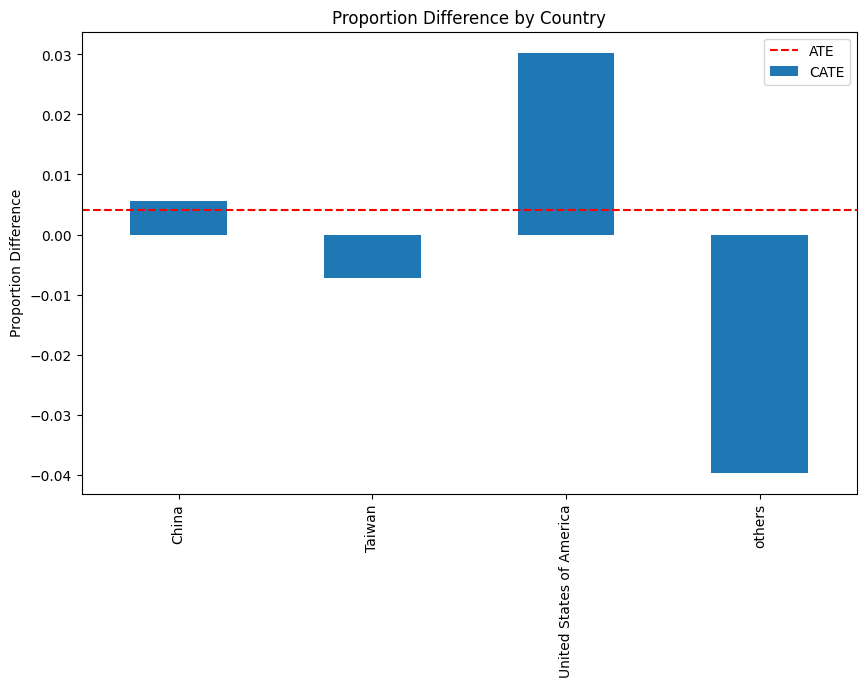

In [ ]:
import matplotlib.pyplot as plt


merged_diff_df = merged_diff['CATE']

fig, ax = plt.subplots(figsize=(10, 6))

merged_diff_df.plot(kind='bar', ax=ax)
ax.set_ylabel('Proportion Difference')
ax.set_title('Proportion Difference by Country')

ax.axhline(y=ate_all, color='red', linestyle='--', label='ATE')

ax.legend()
plt.show()

### Gender

In [ ]:
df_gender = df_preprocess.copy()

# drop the outlier: only 1 person is not in the category of 'M' & 'F'
df_gender.drop(df_gender[df_gender['Gender']=='Genderqueer'].index, axis=0, inplace=True)
# check did I drop it porperly
set(df_gender['Gender']) # {'Female', 'Male'}

{'Female', 'Male'}

In [ ]:
# set condition by gender to see each gender's in each Q's ATE

# we only have gender = {'Female', 'Male'}
filter_list = ['Q1_filter','Q2_filter','Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

# same concept as ATE by now we also groupby 'gender' factor
result2 = []
for filter in filter_list:                        # == count
  result = df_gender.groupby(by=['Gender',filter]).size().reset_index(name='count')
  result['proportion'] = result['count'] / result.groupby(by=['Gender'])['count'].transform('sum')
  result = pd.DataFrame(result) # set as pd.dataframe to make it more easily to extract the value
  result2.append(result)

#result2[0]

In [ ]:
# in the previous table we know that some of the category are missing
# such as ∆ = Male | 3.0 | 0 | 0 (coz nobody has choose this option)
# made the table more uniform, so we append every missing row like ∆

Q1_filter_list = list(set(result2[0]['Q1_filter']))  # 1, 2, 3, 4, 5 (five diff price display)
gender_list = list(set(result2[0]['Gender']))  # F,M (gender we have)
filter_list = ['Q1_filter', 'Q2_filter', 'Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

for i in range(len(result2)):
    # create a new DataFrame with all combinations of country and Q1_filter
    all_combinations = pd.DataFrame(columns=['Gender', filter_list[i]])
    # what value we're going to assign in 'country' and 'Q_filter' column
    for gender in gender_list:
        for q1_filter in Q1_filter_list:
            all_combinations = all_combinations.append({'Gender': gender, filter_list[i]: q1_filter}, ignore_index=True)

    # merge the new DataFrame with the original DataFrame to fill missing values with zeros
    result2[i] = pd.merge(all_combinations, result2[i], on=['Gender', filter_list[i]], how='left').fillna({'count': 0, 'proportion': 0})

    # sort value by country and Q_filter
    result2[i] = result2[i].sort_values(by=['Gender', filter_list[i]]).reset_index(drop=True)

#result2

In [ ]:
# see the ATE in each Q: count => (4-3) - (5-3) = 4-3-5+3 = 4-5
diff_list = []

for i in range(len(result2)):
    diff = (result2[i][result2[i][filter_list[i]] == 4.0].reset_index(drop=True))[['proportion']] - (result2[i][result2[i][filter_list[i]] == 5.0].reset_index(drop=True))[['proportion']]
    diff_list.append(pd.DataFrame(diff))

merged_diff = pd.concat(diff_list, axis=1, keys=[f'Q{i+1}' for i in range(len(diff_list))])


merged_diff.index = ['Female', 'Male']
merged_diff.columns = pd.MultiIndex.from_tuples([(col, 'diff($-%)') for col in merged_diff.columns])

merged_diff['CATE'] = merged_diff.mean(axis=1)
merged_diff

,"(Q1, proportion)","(Q2, proportion)","(Q3, proportion)","(Q4, proportion)","(Q5, proportion)","(Q6, proportion)","(Q7, proportion)","(Q8, proportion)","(Q9, proportion)",CATE
,diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),
Female,0.000000,-0.056604,0.0,-0.018868,0.056604,0.075472,0.047170,-0.028302,-0.009434,0.007338
Male,0.051724,0.000000,0.0,-0.068966,0.051724,-0.103448,0.017241,-0.051724,0.103448,0.000000


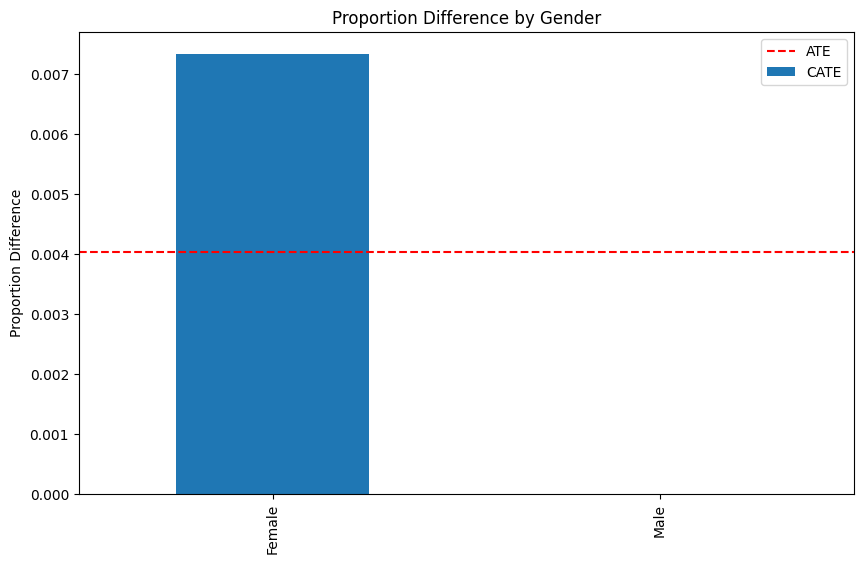

In [ ]:
import matplotlib.pyplot as plt

merged_diff_df = merged_diff['CATE']

fig, ax = plt.subplots(figsize=(10, 6))

merged_diff_df.plot(kind='bar', ax=ax)
ax.set_ylabel('Proportion Difference')
ax.set_title('Proportion Difference by Gender')

ax.axhline(y=ate_all, color='red', linestyle='--', label='ATE')

ax.legend()
plt.show()

### Age

In [ ]:
df_age = df_preprocess.copy()

# see what value do we have
set(df_gender['Age']) # '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old'

# set condition by age to see each age's in each Q's ATE

filter_list = ['Q1_filter','Q2_filter','Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

# same concept as ATE by now we also groupby 'age' factor
result2 = []
for filter in filter_list:                  # == count
  result = df_age.groupby(by=['Age',filter]).size().reset_index(name='count')
  result['proportion'] = result['count'] / result.groupby(by=['Age'])['count'].transform('sum')
  result = pd.DataFrame(result) # set as pd.dataframe to make it more easily to extract the value
  result2.append(result)

#result2

In [ ]:
# in the previous table we know that some of the category are missing
# such as ∆ = 35-44 years old | 3.0 | 0 | 0 (coz nobody has choose this option)
# made the table more uniform, so we append every missing row like ∆

Q1_filter_list = list(set(result2[0]['Q1_filter']))  # 1, 2, 3, 4, 5 (five diff price display)
age_list = list(set(result2[0]['Age']))  # '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old' (age we have)
filter_list = ['Q1_filter', 'Q2_filter', 'Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

for i in range(len(result2)):
    # create a new DataFrame with all combinations of country and Q1_filter
    all_combinations = pd.DataFrame(columns=['Age', filter_list[i]])
    # what value we're going to assign in 'country' and 'Q_filter' column
    for age in age_list:
        for q1_filter in Q1_filter_list:
            all_combinations = all_combinations.append({'Age': age, filter_list[i]: q1_filter}, ignore_index=True)

    # merge the new DataFrame with the original DataFrame to fill missing values with zeros
    result2[i] = pd.merge(all_combinations, result2[i], on=['Age', filter_list[i]], how='left').fillna({'count': 0, 'proportion': 0})

    # sort value by country and Q_filter
    result2[i] = result2[i].sort_values(by=['Age', filter_list[i]]).reset_index(drop=True)

#result2[0]

In [ ]:
# see the ATE in each Q: count => (4-3) - (5-3) = 4-3-5+3 = 4-5
diff_list = []

for i in range(len(result2)):
    diff = (result2[i][result2[i][filter_list[i]] == 4.0].reset_index(drop=True))[['proportion']] - (result2[i][result2[i][filter_list[i]] == 5.0].reset_index(drop=True))[['proportion']]
    diff_list.append(pd.DataFrame(diff))

merged_diff = pd.concat(diff_list, axis=1, keys=[f'Q{i+1}' for i in range(len(diff_list))])

merged_diff.index = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old']
merged_diff.columns = pd.MultiIndex.from_tuples([(col, 'diff($-%)') for col in merged_diff.columns])

merged_diff['CATE'] = merged_diff.mean(axis=1)
merged_diff

,"(Q1, proportion)","(Q2, proportion)","(Q3, proportion)","(Q4, proportion)","(Q5, proportion)","(Q6, proportion)","(Q7, proportion)","(Q8, proportion)","(Q9, proportion)",CATE
,diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),
18-24 years old,0.068493,-0.041096,-0.013699,0.027397,0.000000,0.054795,0.09589,0.027397,0.013699,0.025875
25-34 years old,0.000000,0.013889,0.027778,-0.055556,0.111111,-0.041667,0.00000,0.000000,0.055556,0.012346
35-44 years old,0.000000,-0.200000,0.000000,-0.200000,0.200000,0.200000,-0.20000,-0.600000,0.000000,-0.088889
45-54 years old,0.000000,-0.200000,0.100000,-0.100000,-0.100000,-0.100000,0.20000,-0.500000,0.100000,-0.066667
55-64 years old,-0.400000,-0.200000,-0.400000,-0.400000,0.200000,0.000000,-0.40000,0.000000,-0.200000,-0.200000


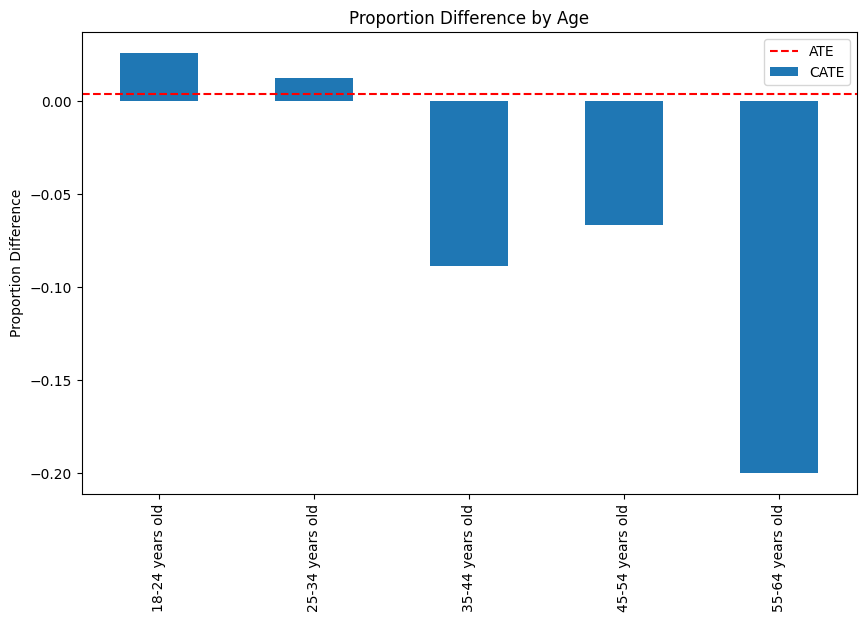

In [ ]:
import matplotlib.pyplot as plt

merged_diff_df = merged_diff['CATE']

fig, ax = plt.subplots(figsize=(10, 6))

merged_diff_df.plot(kind='bar', ax=ax)
ax.set_ylabel('Proportion Difference')
ax.set_title('Proportion Difference by Age')

ax.axhline(y=ate_all, color='red', linestyle='--', label='ATE')

ax.legend()
plt.show()

### Career

In [ ]:
# set condition by career to see each career's in each Q's ATE

df_career = df_preprocess.copy()

# ppl who mostly are in 'Student','Information Technology (IT) and Telecommunications','Education', other career's like 'Energy and Utilities', 'Retail Trade' we be set as 'others'
df_country['Career'] =  df_country['Career'].apply(lambda x: x if x in ['Student','Information Technology (IT) and Telecommunications','Education'] else 'Others')

filter_list = ['Q1_filter','Q2_filter','Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

# same concept as ATE by now we also groupby 'country' factor
result2 = []
for filter in filter_list:                          # == count
  result = df_country.groupby(by=['Career',filter]).size().reset_index(name='count')
  result['proportion'] = result['count'] / result.groupby(by=['Career'])['count'].transform('sum')
  result = pd.DataFrame(result) # set as pd.dataframe to make it more easily to extract the value
  result2.append(result)

#result2

In [ ]:
# in the previous table we know that some of the category are missing
# such as ∆ = Others | 3.0 | 0 | 0 (coz nobody has choose this option)
# made the table more uniform, so we append every missing row like ∆

Q1_filter_list = list(set(result2[0]['Q1_filter']))  # 1, 2, 3, 4, 5 (five diff price display)
career_list = list(set(result2[0]['Career']))  # 'Education', 'IT', 'Others', 'Student' (career we have)
filter_list = ['Q1_filter', 'Q2_filter', 'Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

for i in range(len(result2)):
    # create a new DataFrame with all combinations of country and Q1_filter
    all_combinations = pd.DataFrame(columns=['Career', filter_list[i]])
    # what value we're going to assign in 'country' and 'Q_filter' column
    for career in career_list:
        for q1_filter in Q1_filter_list:
            all_combinations = all_combinations.append({'Career': career, filter_list[i]: q1_filter}, ignore_index=True)

    # merge the new DataFrame with the original DataFrame to fill missing values with zeros
    result2[i] = pd.merge(all_combinations, result2[i], on=['Career', filter_list[i]], how='left').fillna({'count': 0, 'proportion': 0})

    # sort value by career and Q_filter
    result2[i] = result2[i].sort_values(by=['Career', filter_list[i]]).reset_index(drop=True)

#result2[0]

In [ ]:
diff_list = []

for i in range(len(result2)):
    diff = (result2[i][result2[i][filter_list[i]] == 4.0].reset_index(drop=True))[['proportion']] - (result2[i][result2[i][filter_list[i]] == 5.0].reset_index(drop=True))[['proportion']]
    diff_list.append(pd.DataFrame(diff))

merged_diff = pd.concat(diff_list, axis=1, keys=[f'Q{i+1}' for i in range(len(diff_list))])

merged_diff.index = ['Education', 'IT', 'Others', 'Student']
merged_diff.columns = pd.MultiIndex.from_tuples([(col, 'diff($-%)') for col in merged_diff.columns])

merged_diff['CATE'] = merged_diff.mean(axis=1)
merged_diff

,"(Q1, proportion)","(Q2, proportion)","(Q3, proportion)","(Q4, proportion)","(Q5, proportion)","(Q6, proportion)","(Q7, proportion)","(Q8, proportion)","(Q9, proportion)",CATE
,diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),
Education,0.050000,-0.050000,0.000000,-0.100000,0.050000,-0.100000,0.000000,-0.300000,-0.050000,-0.055556
IT,0.115385,-0.038462,-0.038462,0.115385,0.230769,-0.076923,0.153846,-0.076923,0.038462,0.047009
Others,-0.075472,-0.113208,0.018868,-0.094340,0.037736,0.075472,-0.018868,0.094340,0.132075,0.006289
Student,0.045455,0.030303,0.000000,-0.030303,0.000000,0.015152,0.045455,-0.045455,-0.030303,0.003367


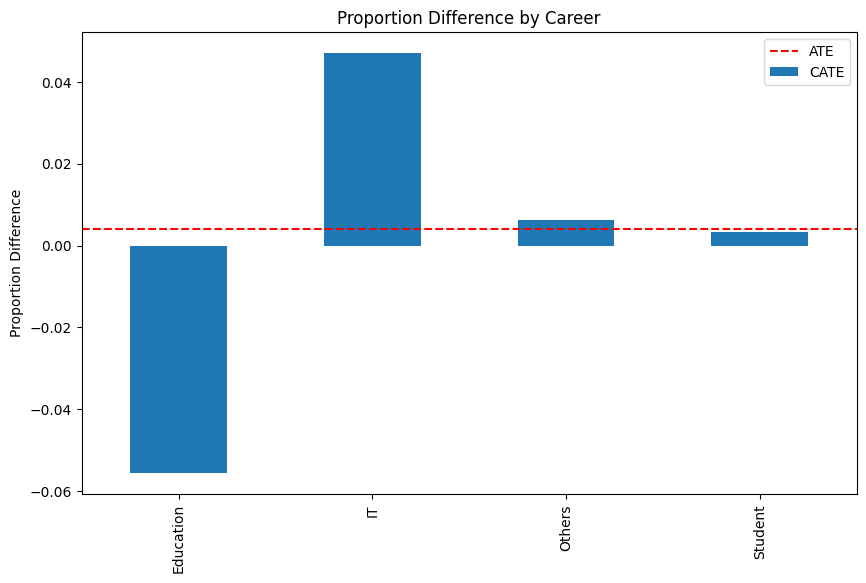

In [ ]:
import matplotlib.pyplot as plt

merged_diff_df = merged_diff['CATE']

fig, ax = plt.subplots(figsize=(10, 6))

merged_diff_df.plot(kind='bar', ax=ax)
ax.set_ylabel('Proportion Difference')
ax.set_title('Proportion Difference by Career')

ax.axhline(y=ate_all, color='red', linestyle='--', label='ATE')

ax.legend()
plt.show()

### Monthly expense

In [ ]:
df_expense = df_preprocess.copy()

# ppl who's expense is
def merge_expense_ranges(expense_range):
    if expense_range in ['$0~$300', '$301~$600','$601~$900', '$901~$1,200']:
        return 'Under $1,200'
    elif expense_range in ['$1,201~$1,500', '$1,501~$1,800','$1,801~$2,100', '$2,101~$2,400']:
        return '$1,201~$2,400'
    elif expense_range in ['$2,401~$2,700', '$2,701~$3,000','Above $3,000']:
        return 'Above $2,401'


df_expense['Monthly Expense'] = df_expense['Monthly Expense'].apply(merge_expense_ranges)

filter_list = ['Q1_filter','Q2_filter','Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

# same concept as ATE by now we also groupby 'country' factor
result2 = []
for filter in filter_list:                          # == count
  result = df_expense.groupby(by=['Monthly Expense',filter]).size().reset_index(name='count')
  result['proportion'] = result['count'] / result.groupby(by=['Monthly Expense'])['count'].transform('sum')
  result = pd.DataFrame(result) # set as pd.dataframe to make it more easily to extract the value
  result2.append(result)

#result2

In [ ]:
# in the previous table we know that some of the category are missing
# such as ∆ = $0~$300 | 3.0 | 0 | 0 (coz nobody has choose this option)
# made the table more uniform, so we append every missing row like ∆

Q1_filter_list = list(set(result2[0]['Q1_filter']))  # 1, 2, 3, 4, 5 (five diff price display)
expense_list = list(set(result2[0]['Monthly Expense']))
filter_list = ['Q1_filter', 'Q2_filter', 'Q3_filter', 'Q4_filter', 'Q5_filter', 'Q6_filter', 'Q7_filter', 'Q8_filter', 'Q9_filter']

for i in range(len(result2)):
    # create a new DataFrame with all combinations of expense and Q1_filter
    all_combinations = pd.DataFrame(columns=['Monthly Expense', filter_list[i]])
    # what value we're going to assign in 'expense' and 'Q_filter' column
    for expense in expense_list:
        for q1_filter in Q1_filter_list:
            all_combinations = all_combinations.append({'Monthly Expense': expense, filter_list[i]: q1_filter}, ignore_index=True)

    # merge the new DataFrame with the original DataFrame to fill missing values with zeros
    result2[i] = pd.merge(all_combinations, result2[i], on=['Monthly Expense', filter_list[i]], how='left').fillna({'count': 0, 'proportion': 0})

    # sort value by expense and Q_filter
    result2[i] = result2[i].sort_values(by=['Monthly Expense', filter_list[i]]).reset_index(drop=True)

#result2[0]

In [ ]:
# see the ATE in each Q: count => (4-3) - (5-3) = 4-3-5+3 = 4-5
diff_list = []

for i in range(len(result2)):
    diff = (result2[i][result2[i][filter_list[i]] == 4.0].reset_index(drop=True))[['proportion']] - (result2[i][result2[i][filter_list[i]] == 5.0].reset_index(drop=True))[['proportion']]
    diff_list.append(pd.DataFrame(diff))

merged_diff = pd.concat(diff_list, axis=1, keys=[f'Q{i+1}' for i in range(len(diff_list))])

merged_diff.index = ['Under $1,200','$1,201~$2,400','Above $2,401']
merged_diff.columns = pd.MultiIndex.from_tuples([(col, 'diff($-%)') for col in merged_diff.columns])


merged_diff['CATE'] = merged_diff.mean(axis=1)
merged_diff

,"(Q1, proportion)","(Q2, proportion)","(Q3, proportion)","(Q4, proportion)","(Q5, proportion)","(Q6, proportion)","(Q7, proportion)","(Q8, proportion)","(Q9, proportion)",CATE
,diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),diff($-%),
"Under $1,200",-0.024390,0.000000,0.048780,-0.121951,0.024390,0.048780,-0.024390,-0.024390,0.024390,-0.005420
"$1,201~$2,400",0.000000,0.000000,-0.030303,-0.060606,0.030303,-0.030303,0.060606,-0.030303,0.030303,-0.003367
"Above $2,401",0.043956,-0.065934,-0.010989,0.010989,0.076923,0.000000,0.054945,-0.043956,0.032967,0.010989


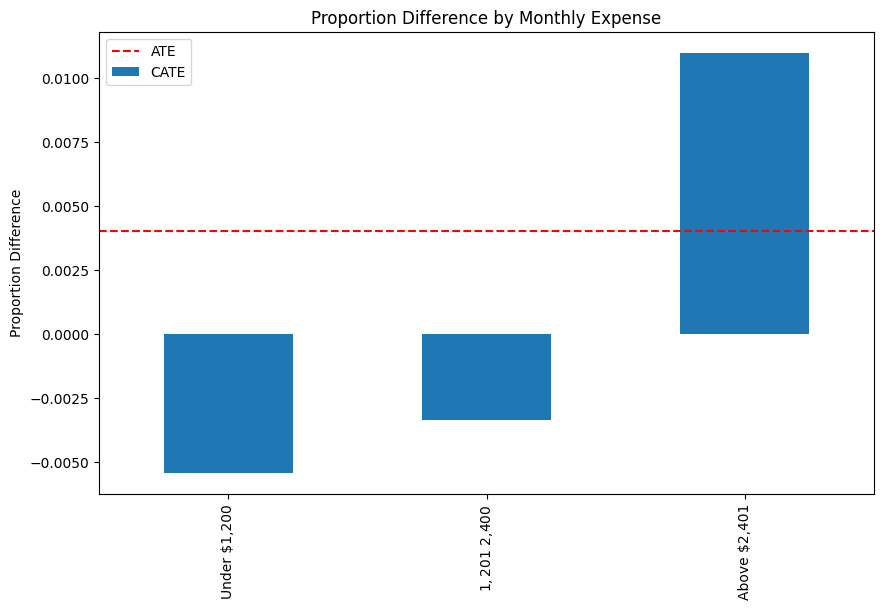

In [ ]:
import matplotlib.pyplot as plt

merged_diff_df = merged_diff['CATE']

fig, ax = plt.subplots(figsize=(10, 6))

merged_diff_df.plot(kind='bar', ax=ax)
ax.set_ylabel('Proportion Difference')
ax.set_title('Proportion Difference by Monthly Expense')

ax.axhline(y=ate_all, color='red', linestyle='--', label='ATE')

ax.legend()
plt.show()

# Statistics

## T-Test, Cohen's D, and Power

In [ ]:
!pip install pingouin

In [ ]:
from scipy import stats
import statsmodels.stats.power as smp

results = []

# Group Cohen's D
def categorize_effect_size(cohen_d):
    if abs(cohen_d) < 0.2:
        return 'Small'
    elif abs(cohen_d) < 0.5:
        return 'Moderate'
    else:
        return 'Large'

# Group power
def categorize_power(power):
    if power < 0.2:
        return 'Low'
    elif power < 0.8:
        return 'Moderate'
    else:
        return 'High'

# Loop through each question
for i in range(1, 10):
    prop_treatment_one = (df_preprocess[df_preprocess[f'Q{i}_group'] == 'T1'][f'Q{i}_filter'] == 3).mean()
    prop_control = (df_preprocess[df_preprocess[f'Q{i}_group'] == 'control'][f'Q{i}_filter'] == 3).mean()

    # T-tests
    t_statistic1, p_value1 = stats.ttest_ind(df_preprocess[df_preprocess[f'Q{i}_group'] == 'T1'][f'Q{i}_filter'] == 4,
                                              df_preprocess[df_preprocess[f'Q{i}_group'] == 'control'][f'Q{i}_filter'] == 3)

    t_statistic2, p_value2 = stats.ttest_ind(df_preprocess[df_preprocess[f'Q{i}_group'] == 'T2'][f'Q{i}_filter'] == 5,
                                              df_preprocess[df_preprocess[f'Q{i}_group'] == 'control'][f'Q{i}_filter'] == 3)

    t_statistic3, p_value3 = stats.ttest_ind(df_preprocess[df_preprocess[f'Q{i}_group'] == 'T1'][f'Q{i}_filter'] == 4,
                                              df_preprocess[df_preprocess[f'Q{i}_group'] == 'T2'][f'Q{i}_filter'] == 5)

    # Cohen's d
    cohen_d_t1_vs_control = (prop_treatment_one - prop_control) / np.sqrt((df_preprocess[f'Q{i}_filter'] == 4).mean() * (1 - (df_preprocess[f'Q{i}_filter'] == 4).mean()) +
                                                                            (df_preprocess[f'Q{i}_filter'] == 3).mean() * (1 - (df_preprocess[f'Q{i}_filter'] == 3).mean()))

    cohen_d_t2_vs_control = (df_preprocess[df_preprocess[f'Q{i}_group'] == 'T2'][f'Q{i}_filter'] == 5).mean() - prop_control / np.sqrt((df_preprocess[f'Q{i}_filter'] == 5).mean() * (1 - (df_preprocess[f'Q{i}_filter'] == 5).mean()) +
                                                                             (df_preprocess[f'Q{i}_filter'] == 3).mean() * (1 - (df_preprocess[f'Q{i}_filter'] == 3).mean()))

    cohen_d_t1_vs_t2 = prop_treatment_one - (df_preprocess[df_preprocess[f'Q{i}_group'] == 'T2'][f'Q{i}_filter'] == 5).mean() / np.sqrt((df_preprocess[f'Q{i}_filter'] == 4).mean() * (1 - (df_preprocess[f'Q{i}_filter'] == 4).mean()) +
                                                                               (df_preprocess[f'Q{i}_filter'] == 5).mean() * (1 - (df_preprocess[f'Q{i}_filter'] == 5).mean()))

    # Power
    power_t1_vs_control = smp.tt_ind_solve_power(effect_size=cohen_d_t1_vs_control, nobs1=len(df_preprocess[df_preprocess[f'Q{i}_group'] == 'T1']),
                                                 alpha=0.05, ratio=len(df_preprocess[df_preprocess[f'Q{i}_group'] == 'control']) / len(df_preprocess[df_preprocess[f'Q{i}_group'] == 'T1']), alternative='two-sided')

    power_t2_vs_control = smp.tt_ind_solve_power(effect_size=cohen_d_t2_vs_control, nobs1=len(df_preprocess[df_preprocess[f'Q{i}_group'] == 'T2']),
                                                 alpha=0.05, ratio=len(df_preprocess[df_preprocess[f'Q{i}_group'] == 'control']) / len(df_preprocess[df_preprocess[f'Q{i}_group'] == 'T2']), alternative='two-sided')

    power_t1_vs_t2 = smp.tt_ind_solve_power(effect_size=cohen_d_t1_vs_t2, nobs1=len(df_preprocess[df_preprocess[f'Q{i}_group'] == 'T1']),
                                            alpha=0.05, ratio=len(df_preprocess[df_preprocess[f'Q{i}_group'] == 'T2']) / len(df_preprocess[df_preprocess[f'Q{i}_group'] == 'T1']), alternative='two-sided')

    # Group Cohen's D and power
    category_t1_vs_control = categorize_effect_size(cohen_d_t1_vs_control)
    category_t2_vs_control = categorize_effect_size(cohen_d_t2_vs_control)
    category_t1_vs_t2 = categorize_effect_size(cohen_d_t1_vs_t2)

    category_power_t1_vs_control = categorize_power(power_t1_vs_control)
    category_power_t2_vs_control = categorize_power(power_t2_vs_control)
    category_power_t1_vs_t2 = categorize_power(power_t1_vs_t2)

    results.append({
        'Question': f'Q{i}',
        'T1 vs Control T-test': round(t_statistic1, 3),
        'T1 vs Control P-value': round(p_value1, 3),
        'T1 vs Control Significance': "Significant" if p_value1 < 0.05 else "Not significant",
        'T1 vs Control Cohens d': round(cohen_d_t1_vs_control, 6),
        'T1 vs Control Cohens d Significance': category_t1_vs_control,
        'T1 vs Control Power': round(power_t1_vs_control, 3),
        'T1 vs Control Power Significance': category_power_t1_vs_control,
        'T2 vs Control T-test': round(t_statistic2, 3),
        'T2 vs Control P-value': round(p_value2, 3),
        'T2 vs Control Significance': "Significant" if p_value2 < 0.05 else "Not significant",
        'T2 vs Control Cohens d': round(cohen_d_t2_vs_control, 6),
        'T2 vs Control Cohens d Significance': category_t2_vs_control,
        'T2 vs Control Power': round(power_t2_vs_control, 3),
        'T2 vs Control Power Significance': category_power_t2_vs_control,
        'T1 vs T2 T-test': round(t_statistic3, 3),
        'T1 vs T2 P-value': round(p_value3, 3),
        'T1 vs T2 Significance': "Significant" if p_value3 < 0.05 else "Not significant",
        'T1 vs T2 Cohens d': round(cohen_d_t1_vs_t2, 6),
        'T1 vs T2 Cohens d Significance': category_t1_vs_t2,
        'T1 vs T2 Power ': round(power_t1_vs_t2, 3),
        'T1 vs T2 PowerSignificance': category_power_t1_vs_t2
    })

results_df = pd.DataFrame(results)

results_df

,Question,T1 vs Control T-test,T1 vs Control P-value,T1 vs Control Significance,T1 vs Control Cohens d,T1 vs Control Cohens d Significance,T1 vs Control Power,T1 vs Control Power Significance,T2 vs Control T-test,T2 vs Control P-value,...,T2 vs Control Cohens d Significance,T2 vs Control Power,T2 vs Control Power Significance,T1 vs T2 T-test,T1 vs T2 P-value,T1 vs T2 Significance,T1 vs T2 Cohens d,T1 vs T2 Cohens d Significance,T1 vs T2 Power,T1 vs T2 PowerSignificance
0,Q1,3.020,0.003,Significant,-0.225786,Moderate,0.215,Moderate,2.456,0.016,...,Small,0.050,Low,0.570,0.570,Not significant,-0.606224,Large,0.891,High
1,Q2,1.535,0.128,Not significant,-0.675969,Large,0.938,High,2.692,0.008,...,Small,0.066,Low,-1.131,0.261,Not significant,-1.062817,Large,1.000,High
2,Q3,1.010,0.315,Not significant,-0.696874,Large,0.950,High,0.784,0.435,...,Moderate,0.358,Moderate,0.234,0.815,Not significant,-0.817192,Large,0.988,High
3,Q4,0.499,0.619,Not significant,-1.008134,Large,0.999,High,1.450,0.150,...,Moderate,0.310,Moderate,-0.936,0.351,Not significant,-1.193495,Large,1.000,High
4,Q5,4.418,0.000,Significant,-0.365600,Moderate,0.480,Moderate,2.695,0.008,...,Small,0.051,Low,1.546,0.125,Not significant,-0.762916,Large,0.977,High
5,Q6,0.666,0.507,Not significant,-0.680621,Large,0.944,High,0.535,0.594,...,Moderate,0.417,Moderate,0.127,0.899,Not significant,-0.770724,Large,0.979,High
6,Q7,3.000,0.003,Significant,-0.599965,Large,0.877,High,1.906,0.059,...,Small,0.130,Low,1.037,0.302,Not significant,-0.879240,Large,0.996,High
7,Q8,0.835,0.406,Not significant,-0.608760,Large,0.886,High,2.024,0.045,...,Small,0.104,Low,-1.174,0.243,Not significant,-0.927201,Large,0.998,High
8,Q9,7.469,0.000,Significant,-0.130421,Small,0.104,Low,6.262,0.000,...,Moderate,0.522,Moderate,0.844,0.400,Not significant,-0.949361,Large,0.999,High


In [ ]:
# Added covariates: monthly_expense_grouped, country_grouped, gender_grouped, and Career

# Group Cohen's D
def categorize_effect_size(cohen_d):
    return 'Small' if abs(cohen_d) < 0.2 else 'Moderate' if abs(cohen_d) < 0.5 else 'Large'

# Group power
def categorize_power(power):
    return 'Low' if power < 0.2 else 'Moderate' if power < 0.8 else 'High'

# Initialize data
group_data = {}
for group in ['control', 'T1', 'T2']:
    for i in range(1, 10):
        group_data[f'{group}_Q{i}'] = df_preprocess[df_preprocess[f'Q{i}_group'] == group][f'Q{i}_filter']

# Initialize results dictionary
group_results = {}

# Loop through each group comparison
for group1 in ['T1', 'T2']:
    for group2 in ['control', 'T1', 'T2']:
        if group1 != group2 and not (group1 == 'T2' and group2 == 'T1'):
            # Cohen's d
            cohen_d = (group_data[f'{group1}_Q1'].mean() - group_data[f'{group2}_Q1'].mean()) / np.sqrt(
                (group_data[f'{group1}_Q1'].std()**2 + group_data[f'{group2}_Q1'].std()**2) / 2)

            # Power
            power = smp.tt_ind_solve_power(effect_size=cohen_d.mean(),
                                           nobs1=len(group_data[f'{group1}_Q1']),
                                           alpha=0.05,
                                           ratio=len(group_data[f'{group2}_Q1']) / len(group_data[f'{group1}_Q1']),
                                           alternative='two-sided')

            # Categorize Cohen's d and Power
            category_cohen_d = categorize_effect_size(cohen_d.mean())
            category_power = categorize_power(power.mean())

            # Save results
            group_results[f'{group1} vs {group2}'] = {
                'Cohens d': round(cohen_d.mean(), 6),
                'Power': round(power.mean(), 3),
                'Cohens d Significance': category_cohen_d,
                'Power Significance': category_power
            }

group_results_df = pd.DataFrame(group_results).transpose()
group_results_df.columns = ['Cohens d', 'Power', 'Cohens d Significance', 'Power Significance']
group_results_df = group_results_df.reindex(['T1 vs control', 'T2 vs control', 'T1 vs T2'])

group_results_df

,Cohens d,Power,Cohens d Significance,Power Significance
T1 vs control,0.582454,0.853,Large,High
T2 vs control,0.687291,0.943,Large,High
T1 vs T2,-0.167667,0.143,Small,Low


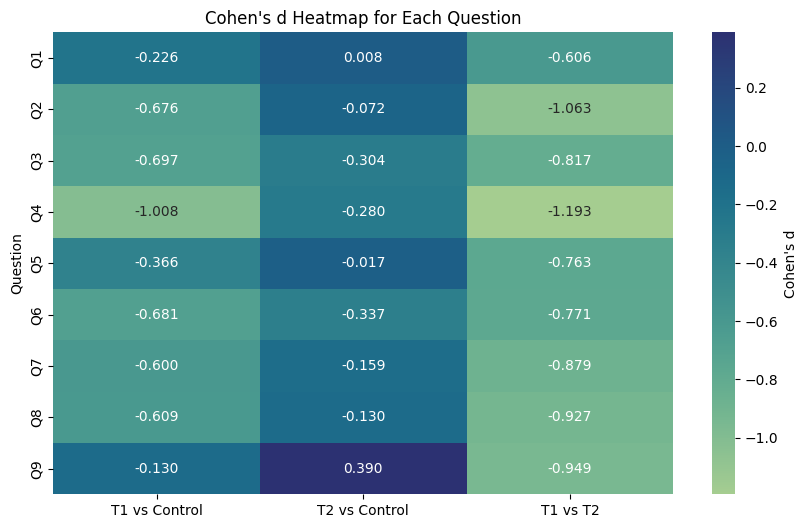

In [ ]:
# Heatmap for Cohen's D
results_df.set_index('Question', inplace=True)
columns_for_heatmap = ['T1 vs Control Cohens d', 'T2 vs Control Cohens d', 'T1 vs T2 Cohens d']

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(results_df[columns_for_heatmap], annot=True, cmap="crest", fmt=".3f", cbar_kws={'label': "Cohen's d"})
heatmap.set_xticklabels(['T1 vs Control', 'T2 vs Control', 'T1 vs T2'])

plt.title("Cohen's d Heatmap for Each Question")
plt.show()

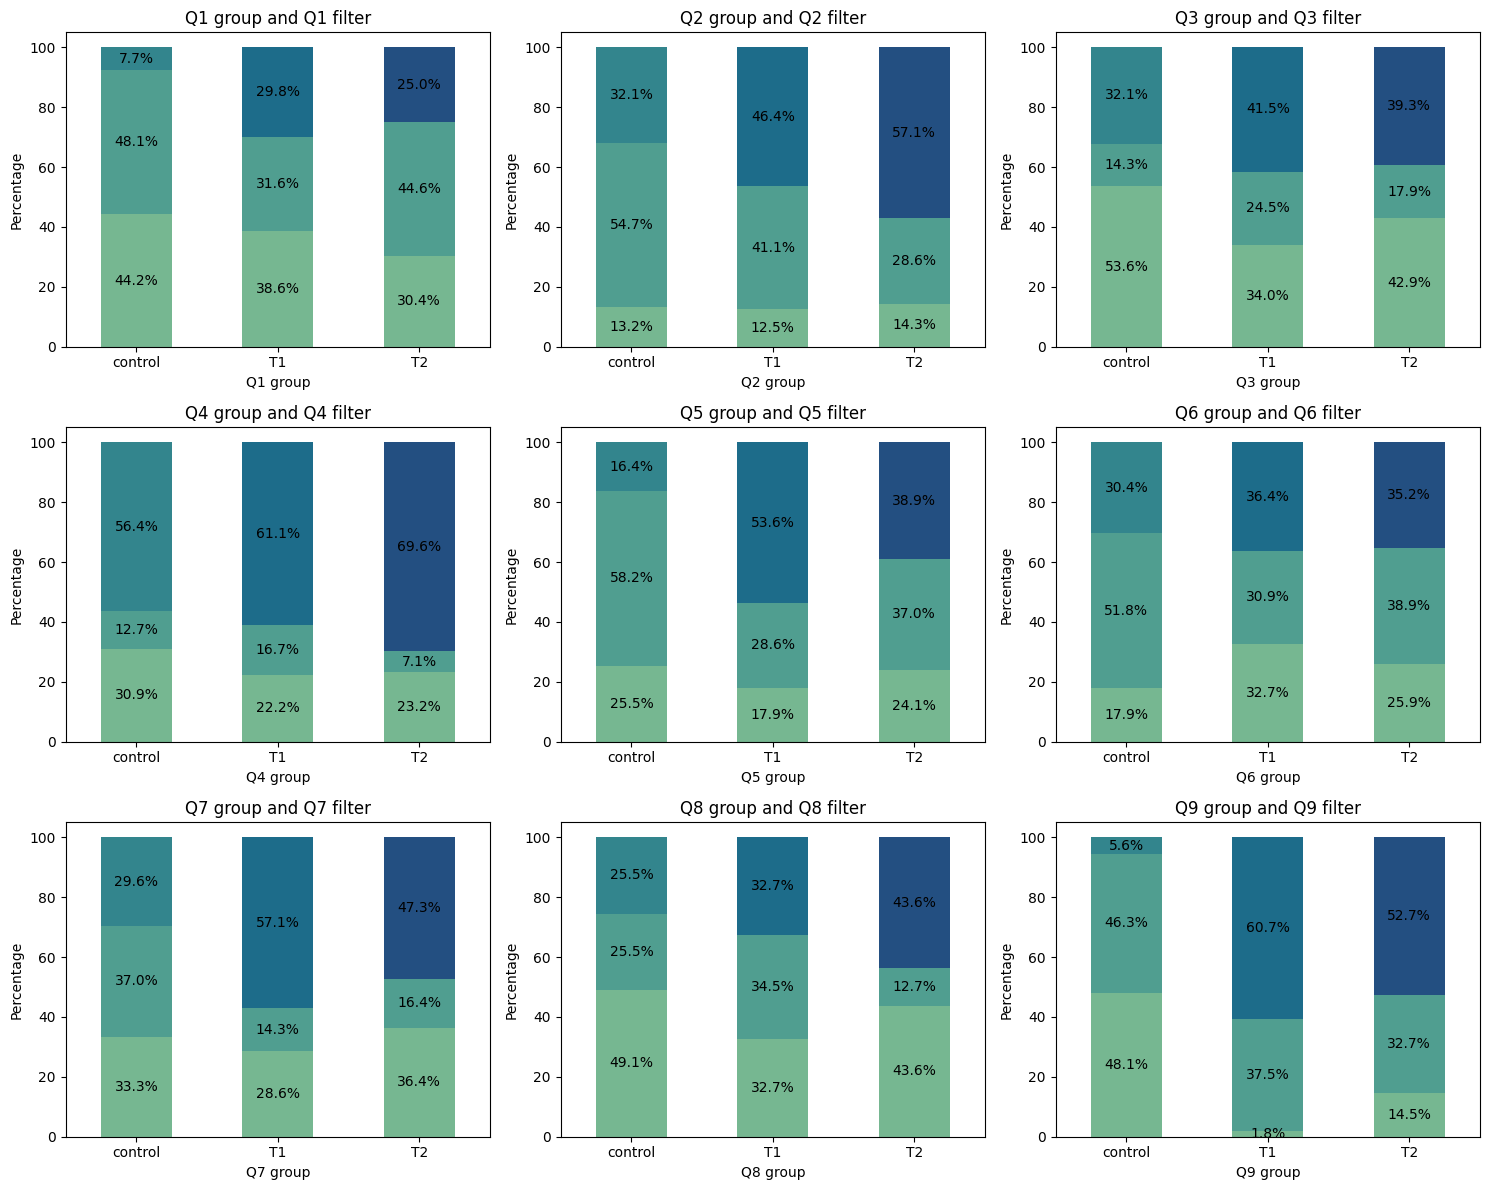

In [ ]:
# Stacked bar chart for each question over different groups (control, treatment 1, treatment 2)
order = ['control', 'T1', 'T2']

custom_palette = sns.color_palette("crest", 5)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, ax in enumerate(axes.flat, start=1):
    grouped_data = df_preprocess.groupby([f'Q{i}_group', f'Q{i}_filter']).size().unstack(fill_value=0)
    grouped_data = grouped_data.reindex(order, axis=0)
    group_totals = grouped_data.sum(axis=1)
    grouped_data_percentage = grouped_data.divide(group_totals, axis=0) * 100
    grouped_data_percentage.plot(kind='bar', stacked=True, ax=ax, color=custom_palette, legend=False)

    ax.set_title(f'Q{i} group and Q{i} filter')
    ax.set_xlabel(f'Q{i} group')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        x, y = patch.get_xy()
        if height != 0.0:
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()

## Regression

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

for i in range(1, 10):
    control_count = (df_preprocess[f'Q{i}_group'] == 'control').sum()
    treatment1_count = (df_preprocess[f'Q{i}_group'] == 'T1').sum()
    treatment2_count = (df_preprocess[f'Q{i}_group'] == 'T2').sum()

    control_prop = control_count / 165
    treatment1_prop = treatment1_count / 165
    treatment2_prop = treatment2_count / 165

    stat1, pval1 = proportions_ztest([control_count, treatment1_count], [165, 165])
    stat2, pval2 = proportions_ztest([control_count, treatment2_count], [165, 165])
    stat3, pval3 = proportions_ztest([treatment1_count, treatment2_count], [165, 165])

    if pval1 > 0.05 and pval2 > 0.05 and pval3 > 0.05:
        print(f"For question Q{i}, the result is properly randomized.")
    else:
        print(f"For question Q{i}, the result is not properly randomized.")

For question Q1, the result is properly randomized.
For question Q2, the result is properly randomized.
For question Q3, the result is properly randomized.
For question Q4, the result is properly randomized.
For question Q5, the result is properly randomized.
For question Q6, the result is properly randomized.
For question Q7, the result is properly randomized.
For question Q8, the result is properly randomized.
For question Q9, the result is properly randomized.


In [ ]:
import statsmodels.api as sm

# Loop through questions Q1 to Q9
for i in range(1, 10):
    question_col = f'Q{i}_filter'
    group_col = f'Q{i}_group'
    filter_recoded_col = f'Q{i}_filter_recoded'
    group_dummy_cols = [f'Q{i}_group_T1', f'Q{i}_group_T2']

    # Convert filter column to categorical variable
    df_preprocess[filter_recoded_col] = df_preprocess[question_col].replace({3: 3, 4: 3, 5: 3})
    df_preprocess[filter_recoded_col] = pd.Categorical(df_preprocess[filter_recoded_col])

    # Convert group column to categorical variable
    df_preprocess[group_col] = pd.Categorical(df_preprocess[group_col])

    # Create design matrices for the model
    endog = pd.get_dummies(df_preprocess[filter_recoded_col], prefix=f'{filter_recoded_col}')
    exog = sm.add_constant(pd.get_dummies(df_preprocess[group_col], prefix=f'{group_col}'))[group_dummy_cols]

    # Multinomial logistic regression
    multinomial_model = sm.MNLogit(endog, exog)
    multinomial_results = multinomial_model.fit()

    print(f"Results for {question_col}:")
    print(multinomial_results.summary())
    print(np.exp(multinomial_results.params))
    print("\n" + "="*80 + "\n")

Optimization terminated successfully.
         Current function value: 1.086205
         Iterations 5
Results for Q1_filter:
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  165
Model:                        MNLogit   Df Residuals:                      161
Method:                           MLE   Df Model:                            2
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                -0.02276
Time:                        03:41:05   Log-Likelihood:                -179.22
converged:                       True   LL-Null:                       -175.23
Covariance Type:            nonrobust   LLR p-value:                     1.000
y=Q1_filter_recoded_2.0       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Q1_group_T1                -0.2007      0.318     -0.631   

In [ ]:
import warnings
warnings.filterwarnings("ignore")

results_df = pd.DataFrame()

for i in range(1, 10):
    question_col = f'Q{i}_filter'
    group_col = f'Q{i}_group'
    filter_recoded_col = f'Q{i}_filter_recoded'
    group_dummy_cols = [f'Q{i}_group_T1', f'Q{i}_group_T2']

    df_preprocess[filter_recoded_col] = df_preprocess[question_col].replace({3: 3, 4: 3, 5: 3})
    df_preprocess[filter_recoded_col] = pd.Categorical(df_preprocess[filter_recoded_col])

    df_preprocess[group_col] = pd.Categorical(df_preprocess[group_col])
    endog = pd.get_dummies(df_preprocess[filter_recoded_col], prefix=f'{filter_recoded_col}')
    exog = sm.add_constant(pd.get_dummies(df_preprocess[group_col], prefix=f'{group_col}'))[group_dummy_cols]
    multinomial_model = sm.MNLogit(endog, exog)
    multinomial_results = multinomial_model.fit()

    table_data = multinomial_results.summary().tables[1]
    table_df = pd.DataFrame(table_data.data[1:], columns=table_data.data[0])
    table_df1 = table_df.iloc[3:]
    table_df1['coef'] = pd.to_numeric(table_df1['coef'])
    table_df1['[0.025'] = pd.to_numeric(table_df1['[0.025'])
    table_df1['0.975]'] = pd.to_numeric(table_df1['0.975]'])
    table_df1['OR_coef'] = table_df1['coef'].apply(lambda x: round(pow(2, x), 4))
    table_df1['OR_95CI_L'] = table_df1['[0.025'].apply(lambda x: round(pow(2, x), 4))
    table_df1['OR_95CI_H'] = table_df1['0.975]'].apply(lambda x: round(pow(2, x), 4))
    table_df1['Question'] = f'Q{i}'

    table_df1 = table_df1.rename(columns={f'y={filter_recoded_col}_2.0': 'Compare'})

    results_df = pd.concat([results_df, table_df1])

results_df = results_df.sort_values(by='Question', ascending=True).reset_index(drop=True)

Optimization terminated successfully.
         Current function value: 1.086205
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.010407
         Iterations 6
Optimization terminated successfully.
         Current function value: 1.070857
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.936372
         Iterations 6
Optimization terminated successfully.
         Current function value: 1.058372
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.093325
         Iterations 4
Optimization terminated successfully.
         Current function value: 1.023318
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.060998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.939412
         Iterations 8


In [ ]:
results_df

,Compare,coef,std err,z,P>|z|,[0.025,0.975],OR_coef,OR_95CI_L,OR_95CI_H,Question
0,Q1_group_T1,-2.578000e-01,0.323,-0.798,0.425,-0.891,0.375,0.8364,0.5392,1.2968,Q1
1,Q1_group_T2,-1.942000e-01,0.361,-0.538,0.591,-0.902,0.513,0.8741,0.5351,1.4270,Q1
2,Q2_group_T1,1.312200e+00,0.426,3.082,0.002,0.478,2.147,2.4832,1.3928,4.4291,Q2
3,Q2_group_T2,1.386300e+00,0.395,3.507,0.000,0.612,2.161,2.6141,1.5284,4.4722,Q2
4,Q3_group_T1,2.007000e-01,0.318,0.631,0.528,-0.422,0.824,1.1493,0.7464,1.7703,Q3
5,Q3_group_T2,-8.700000e-02,0.295,-0.295,0.768,-0.666,0.491,0.9415,0.6303,1.4054,Q3
6,Q4_group_T1,1.011600e+00,0.337,3.001,0.003,0.351,1.672,2.0161,1.2754,3.1866,Q4
7,Q4_group_T2,1.098600e+00,0.320,3.430,0.001,0.471,1.726,2.1415,1.3861,3.3081,Q4
8,Q5_group_T2,4.796000e-01,0.353,1.359,0.174,-0.212,1.171,1.3944,0.8633,2.2517,Q5
9,Q5_group_T1,1.098600e+00,0.365,3.009,0.003,0.383,1.814,2.1415,1.3041,3.5162,Q5


In [ ]:
df_low = results_df.iloc[:6].sort_values(by='Question', ascending=True).reset_index(drop=True)
df_mid = results_df.iloc[6:12].sort_values(by='Question', ascending=True).reset_index(drop=True)
df_hig = results_df.iloc[12:].sort_values(by='Question', ascending=True).reset_index(drop=True)

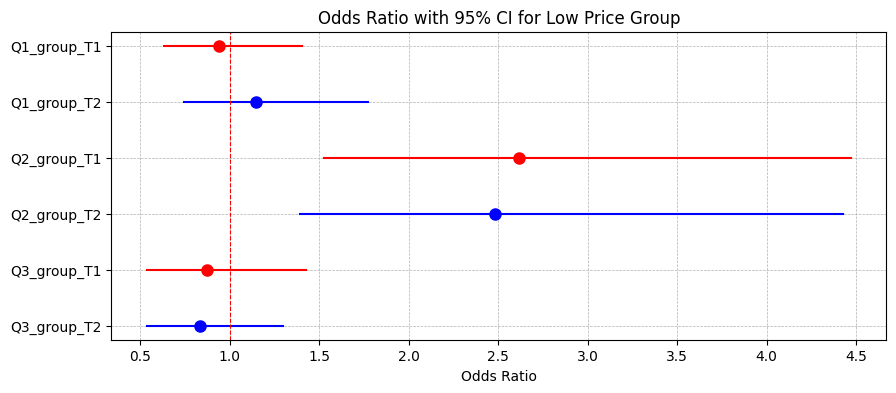

In [ ]:
plt.figure(figsize=(10, 4))

for index, row in df_low.iterrows():
    if index % 2 == 0:
        color = 'blue'
    else:
        color = 'red'

    plt.plot([row['OR_coef']], [index], marker='o', markersize=8, color=color)
    plt.plot([row['OR_95CI_L'], row['OR_95CI_H']], [index, index], color=color)

plt.yticks(range(len(df_low)-1, -1, -1), df_low['Compare'])
plt.xlabel('Odds Ratio')
plt.title('Odds Ratio with 95% CI for Low Price Group')
plt.axvline(x=1, linestyle='--', color='red', linewidth=0.8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

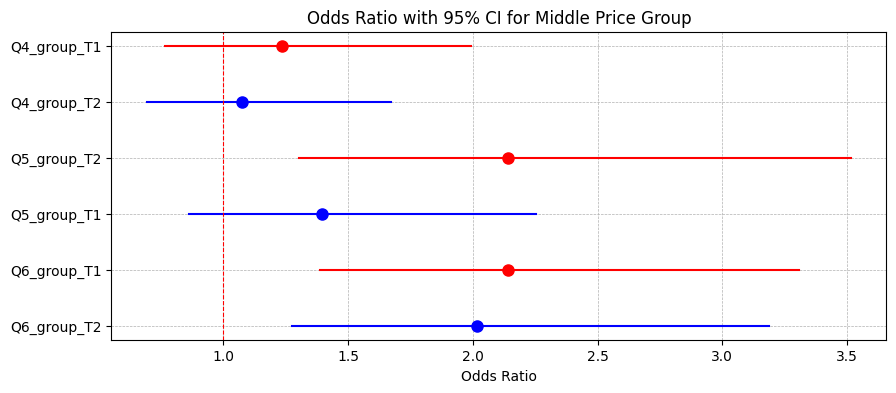

In [ ]:
plt.figure(figsize=(10, 4))

for index, row in df_mid.iterrows():
    if index % 2 == 0:
        color = 'blue'
    else:
        color = 'red'

    plt.plot([row['OR_coef']], [index], marker='o', markersize=8, color=color)
    plt.plot([row['OR_95CI_L'], row['OR_95CI_H']], [index, index], color=color)

plt.yticks(range(len(df_mid)-1, -1, -1), df_mid['Compare'])
plt.xlabel('Odds Ratio')
plt.title('Odds Ratio with 95% CI for Middle Price Group')
plt.axvline(x=1, linestyle='--', color='red', linewidth=0.8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

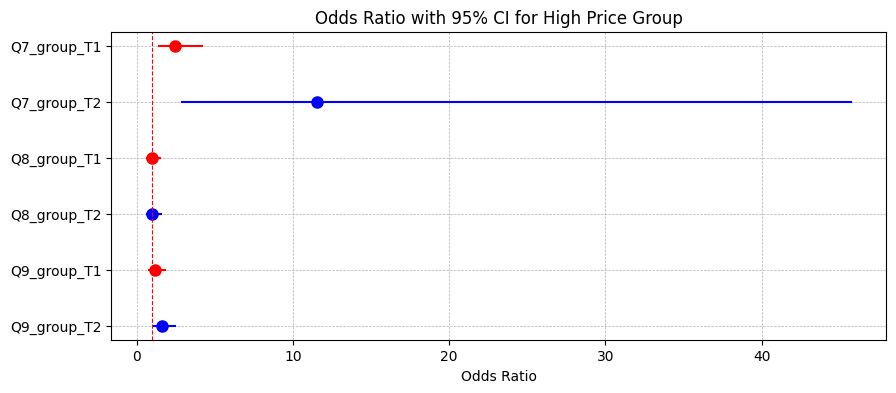

In [ ]:
plt.figure(figsize=(10, 4))

for index, row in df_hig.iterrows():
    if index % 2 == 0:
        color = 'blue'
    else:
        color = 'red'
    plt.plot([row['OR_coef']], [index], marker='o', markersize=8, color=color)
    plt.plot([row['OR_95CI_L'], row['OR_95CI_H']], [index, index], color=color)
plt.yticks(range(len(df_hig)-1, -1, -1), df_hig['Compare'])
plt.xlabel('Odds Ratio')
plt.title('Odds Ratio with 95% CI for High Price Group')
plt.axvline(x=1, linestyle='--', color='red', linewidth=0.8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Covariate

In [ ]:
df_grouped_regression = df_preprocess.copy()

# ppl who reside most in 'Taiwan', 'USA', 'China', other place's like hong kong, japan are less, so we merge other country into 'others' category
df_grouped_regression['country_grouped'] =  df_grouped_regression['country'].apply(lambda x: x if x in ['Taiwan', "United States of America", 'China'] else 'others')

# Gender
df_grouped_regression['gender_grouped'] = df_grouped_regression['Gender']
df_grouped_regression['gender_grouped'].drop(df_grouped_regression[df_grouped_regression['gender_grouped']=='Genderqueer'].index, axis=0, inplace=True)

# Career
df_grouped_regression['Career'] =  df_grouped_regression['Career'].apply(lambda x: x if x in ['Student','Information Technology (IT) and Telecommunications','Education'] else 'Others')

# Monthly  expense
def merge_expense_ranges(expense_range):
    if expense_range in ['$0~$300', '$301~$600','$601~$900', '$901~$1,200']:
        return 'Under $1,200'
    elif expense_range in ['$1,201~$1,500', '$1,501~$1,800','$1,801~$2,100', '$2,101~$2,400']:
        return '$1,201~$2,400'
    elif expense_range in ['$2,401~$2,700', '$2,701~$3,000','Above $3,000']:
        return 'Above $2,401'
df_grouped_regression['monthly_expense_grouped'] = df_grouped_regression['Monthly Expense'].apply(merge_expense_ranges)

df_grouped_regression

,StartDate,EndDate,Duration (in seconds),LocationLatitude,LocationLongitude,country,Gender,Age,Career,Monthly Expense,...,Q3_filter_recoded,Q4_filter_recoded,Q5_filter_recoded,Q6_filter_recoded,Q7_filter_recoded,Q8_filter_recoded,Q9_filter_recoded,country_grouped,gender_grouped,monthly_expense_grouped
0,2024-02-27 19:04:41,2024-02-27 19:06:36,115,42.3973,-71.0372,United States of America,Female,18-24 years old,Student,$601~$900,...,1.0,3.0,3.0,1.0,1.0,1.0,3.0,United States of America,Female,"Under $1,200"
1,2024-02-27 19:05:40,2024-02-27 19:06:58,78,42.3562,-71.0631,United States of America,Male,18-24 years old,Student,"$1,801~$2,100",...,1.0,1.0,3.0,1.0,1.0,1.0,1.0,United States of America,Male,"$1,201~$2,400"
2,2024-02-27 19:10:43,2024-02-27 19:12:27,103,32.7908,-96.8336,United States of America,Female,25-34 years old,Student,"$1,201~$1,500",...,3.0,2.0,1.0,1.0,2.0,1.0,1.0,United States of America,Female,"$1,201~$2,400"
3,2024-02-27 19:10:24,2024-02-27 19:12:48,143,42.3464,-71.0975,United States of America,Male,18-24 years old,Student,"$2,401~$2,700",...,2.0,3.0,1.0,2.0,1.0,1.0,3.0,United States of America,Male,"Above $2,401"
4,2024-02-27 19:13:28,2024-02-27 19:16:12,164,42.2506,-71.1286,United States of America,Female,18-24 years old,Student,"$2,701~$3,000",...,2.0,3.0,2.0,3.0,2.0,1.0,3.0,United States of America,Female,"Above $2,401"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2024-02-29 11:09:30,2024-03-01 00:16:40,47229,22.9917,120.2148,Taiwan,Female,25-34 years old,Education,$601~$900,...,3.0,3.0,2.0,1.0,3.0,1.0,1.0,Taiwan,Female,"Under $1,200"
161,2024-03-03 04:00:18,2024-03-03 04:02:51,153,25.0504,121.5324,Taiwan,Female,25-34 years old,Others,$601~$900,...,2.0,2.0,3.0,2.0,1.0,1.0,1.0,Taiwan,Female,"Under $1,200"
162,2024-03-04 07:39:42,2024-03-04 07:44:06,263,24.1440,120.6844,Taiwan,Female,18-24 years old,Others,$0~$300,...,1.0,3.0,2.0,3.0,1.0,1.0,1.0,Taiwan,Female,"Under $1,200"
163,2024-03-04 09:07:43,2024-03-04 09:10:53,189,25.0504,121.5324,Taiwan,Female,18-24 years old,Student,"Above $3,000",...,2.0,1.0,3.0,2.0,2.0,1.0,1.0,Taiwan,Female,"Above $2,401"


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Loop through questions Q1 to Q9
for i in range(1, 10):
    question_col = f'Q{i}_filter'
    group_col = f'Q{i}_group'
    filter_recoded_col = f'Q{i}_filter_recoded'
    group_dummy_cols = [f'Q{i}_group_T1', f'Q{i}_group_T2']

    # Convert filter column to categorical variable
    df_grouped_regression[filter_recoded_col] = df_grouped_regression[question_col].replace({3: 3, 4: 3, 5: 3})
    df_grouped_regression[filter_recoded_col] = pd.Categorical(df_grouped_regression[filter_recoded_col])

    # Convert group column to categorical variable
    df_grouped_regression[group_col] = pd.Categorical(df_grouped_regression[group_col])

    # Create design matrices for the model
    endog = pd.get_dummies(df_grouped_regression[filter_recoded_col], prefix=f'{filter_recoded_col}')
    exog = sm.add_constant(pd.get_dummies(df_grouped_regression[group_col], prefix=f'{group_col}'))[group_dummy_cols]

    # Add covariates to the exog matrix
    exog = pd.concat([exog,
                    # pd.get_dummies(df_grouped_regression['monthly_expense_grouped'], prefix='monthly_expense'),
                     pd.get_dummies(df_grouped_regression['country_grouped'], prefix='country'),
                     pd.get_dummies(df_grouped_regression['gender_grouped'], prefix='gender'),
                     pd.get_dummies(df_grouped_regression['Career'], prefix='career')],
                     axis=1)

    # Flatten the endog array
    endog = endog.idxmax(axis=1)

    # Multinomial logistic regression using statsmodels
    mnlogit_model = sm.MNLogit(endog, exog)
    result = mnlogit_model.fit()

#    print(f"Results for {question_col}:")
#    print(result.summary())
#    print("\n" + "="*80 + "\n")

In [ ]:
# Added covaraties: monthly_expense_grouped, country_grouped, gender_grouped, and Career
# Loop through questions Q1 to Q9
for i in range(1, 10):
    question_col = f'Q{i}_filter'
    group_col = f'Q{i}_group'
    filter_recoded_col = f'Q{i}_filter_recoded'

    monthly_expense_grouped = df_grouped_regression['monthly_expense_grouped']
    country_group = df_grouped_regression['country_grouped']
    gender_group =  df_grouped_regression['gender_grouped']
    career_group = df_grouped_regression['Career']

    group_dummy_cols = [f'Q{i}_group_T1', f'Q{i}_group_T2']

    # Convert filter column to categorical variable
    df_grouped_regression[filter_recoded_col] = df_grouped_regression[question_col].replace({3: 3, 4: 3, 5: 3})
    df_grouped_regression[filter_recoded_col] = pd.Categorical(df_grouped_regression[filter_recoded_col])

    # Convert group column to categorical variable
    df_grouped_regression[group_col] = pd.Categorical(df_grouped_regression[group_col])

    # Create design matrices for the model
    endog = pd.get_dummies(df_grouped_regression[filter_recoded_col], prefix=f'{filter_recoded_col}')
    exog = sm.add_constant(pd.get_dummies(df_grouped_regression[group_col], prefix=f'{group_col}'))[group_dummy_cols]

    # Multinomial logistic regression
    multinomial_model = sm.MNLogit(endog, exog)
    multinomial_results = multinomial_model.fit()

    print(f"Results for {question_col}:")
    print(multinomial_results.summary())

    # P-values for each covariate
    p_values = multinomial_results.pvalues

    # P-values for each covariate
    print("P-values for covariates:")
    print(p_values)

    # Significant covariates (p-value < 0.05)
    significant_covariates = p_values[p_values < 0.05].index
    print("Significant covariates:")
    print(significant_covariates)

    print("\n" + "="*80 + "\n")

Optimization terminated successfully.
         Current function value: 1.086205
         Iterations 5
Results for Q1_filter:
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  165
Model:                        MNLogit   Df Residuals:                      161
Method:                           MLE   Df Model:                            2
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                -0.02276
Time:                        03:42:39   Log-Likelihood:                -179.22
converged:                       True   LL-Null:                       -175.23
Covariance Type:            nonrobust   LLR p-value:                     1.000
y=Q1_filter_recoded_2.0       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Q1_group_T1                -0.2007      0.318     -0.631   

In [ ]:
for i in range(1, 10):
    question_col = f'Q{i}_filter'
    group_col = f'Q{i}_group'
    filter_recoded_col = f'Q{i}_filter_recoded'

    monthly_expense_grouped = df_grouped_regression['monthly_expense_grouped']
    country_group = df_grouped_regression['country_grouped']
    gender_group =  df_grouped_regression['gender_grouped']
    career_group = df_grouped_regression['Career']

    group_dummy_cols = [f'Q{i}_group_T1', f'Q{i}_group_T2']

    # Convert filter column to categorical variable
    df_grouped_regression[filter_recoded_col] = df_grouped_regression[question_col].replace({3: 3, 4: 3, 5: 3})
    df_grouped_regression[filter_recoded_col] = pd.Categorical(df_grouped_regression[filter_recoded_col])

    # Convert group column to categorical variable
    df_grouped_regression[group_col] = pd.Categorical(df_grouped_regression[group_col])

    # Create design matrices for the model
    endog = pd.get_dummies(df_grouped_regression[filter_recoded_col], prefix=f'{filter_recoded_col}')
    exog = sm.add_constant(pd.concat([pd.get_dummies(df_grouped_regression[group_col], prefix=f'{group_col}')[group_dummy_cols],
                                      monthly_expense_grouped, country_group, gender_group, career_group], axis=1))

    print("Endog data types:", endog.dtypes)
    print("Exog data types:", exog.dtypes)

    if (endog.dtypes == object).any() or (exog.dtypes == object).any():
        print("Error: Data types are not compatible. Please check input data.")
        continue

    multinomial_model = sm.MNLogit(endog, exog)
    multinomial_results = multinomial_model.fit()

    table_data = multinomial_results.summary().tables[1]
    table_df = pd.DataFrame(table_data.data[1:], columns=table_data.data[0])
    table_df1 = table_df.iloc[3:]
    table_df1['coef'] = pd.to_numeric(table_df1['coef'])
    table_df1['[0.025'] = pd.to_numeric(table_df1['[0.025'])
    table_df1['0.975]'] = pd.to_numeric(table_df1['0.975]'])
    table_df1['OR_coef'] = table_df1['coef'].apply(lambda x: round(pow(2, x), 4))
    table_df1['OR_95CI_L'] = table_df1['[0.025'].apply(lambda x: round(pow(2, x), 4))
    table_df1['OR_95CI_H'] = table_df1['0.975]'].apply(lambda x: round(pow(2, x), 4))
    table_df1['Question'] = f'Q{i}'

    table_df1 = table_df1.rename(columns={f'y={filter_recoded_col}_2.0': 'Compare'})

    results_df_cov = pd.concat([results_df, table_df1])

results_df_cov = results_df.sort_values(by='Question', ascending=True).reset_index(drop=True)

In [ ]:
results_df_cov

,Compare,coef,std err,z,P>|z|,[0.025,0.975],OR_coef,OR_95CI_L,OR_95CI_H,Question
0,Q1_group_T1,-2.578000e-01,0.323,-0.798,0.425,-0.891,0.375,0.8364,0.5392,1.2968,Q1
1,Q1_group_T2,-1.942000e-01,0.361,-0.538,0.591,-0.902,0.513,0.8741,0.5351,1.4270,Q1
2,Q2_group_T1,1.312200e+00,0.426,3.082,0.002,0.478,2.147,2.4832,1.3928,4.4291,Q2
3,Q2_group_T2,1.386300e+00,0.395,3.507,0.000,0.612,2.161,2.6141,1.5284,4.4722,Q2
4,Q3_group_T1,2.007000e-01,0.318,0.631,0.528,-0.422,0.824,1.1493,0.7464,1.7703,Q3
5,Q3_group_T2,-8.700000e-02,0.295,-0.295,0.768,-0.666,0.491,0.9415,0.6303,1.4054,Q3
6,Q4_group_T1,1.011600e+00,0.337,3.001,0.003,0.351,1.672,2.0161,1.2754,3.1866,Q4
7,Q4_group_T2,1.098600e+00,0.320,3.430,0.001,0.471,1.726,2.1415,1.3861,3.3081,Q4
8,Q5_group_T1,1.098600e+00,0.365,3.009,0.003,0.383,1.814,2.1415,1.3041,3.5162,Q5
9,Q5_group_T2,4.796000e-01,0.353,1.359,0.174,-0.212,1.171,1.3944,0.8633,2.2517,Q5


In [ ]:
df_low_cov = results_df_cov.iloc[:6].sort_values(by='Question', ascending=True).reset_index(drop=True)
df_mid_cov = results_df_cov.iloc[6:12].sort_values(by='Question', ascending=True).reset_index(drop=True)
df_hig_cov = results_df_cov.iloc[12:].sort_values(by='Question', ascending=True).reset_index(drop=True)

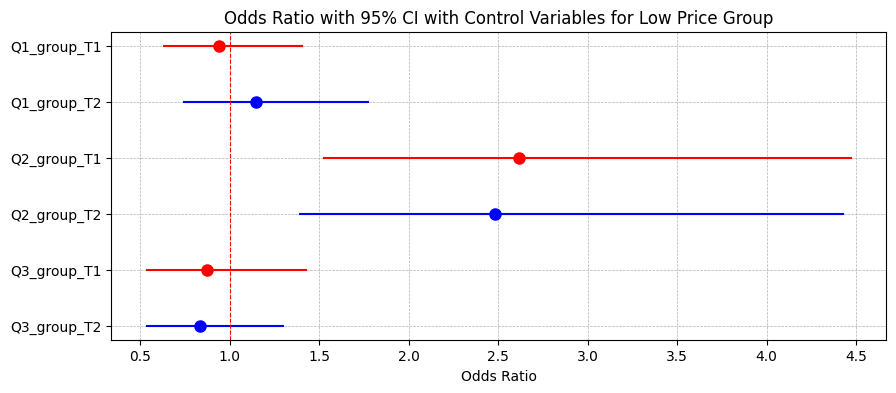

In [ ]:
plt.figure(figsize=(10, 4))

for index, row in df_low_cov.iterrows():
    if index % 2 == 0:
        color = 'blue'
    else:
        color = 'red'

    plt.plot([row['OR_coef']], [index], marker='o', markersize=8, color=color)
    plt.plot([row['OR_95CI_L'], row['OR_95CI_H']], [index, index], color=color)

plt.yticks(range(len(df_low_cov)-1, -1, -1), df_low_cov['Compare'])
plt.xlabel('Odds Ratio')
plt.title('Odds Ratio with 95% CI with Control Variables for Low Price Group')
plt.axvline(x=1, linestyle='--', color='red', linewidth=0.8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

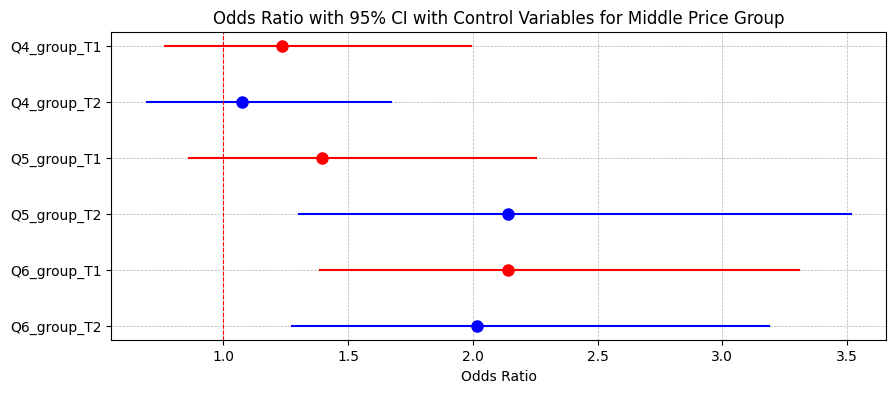

In [ ]:
plt.figure(figsize=(10, 4))

for index, row in df_mid_cov.iterrows():
    if index % 2 == 0:
        color = 'blue'
    else:
        color = 'red'

    plt.plot([row['OR_coef']], [index], marker='o', markersize=8, color=color)
    plt.plot([row['OR_95CI_L'], row['OR_95CI_H']], [index, index], color=color)

plt.yticks(range(len(df_mid_cov)-1, -1, -1), df_mid_cov['Compare'])
plt.xlabel('Odds Ratio')
plt.title('Odds Ratio with 95% CI with Control Variables for Middle Price Group')
plt.axvline(x=1, linestyle='--', color='red', linewidth=0.8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

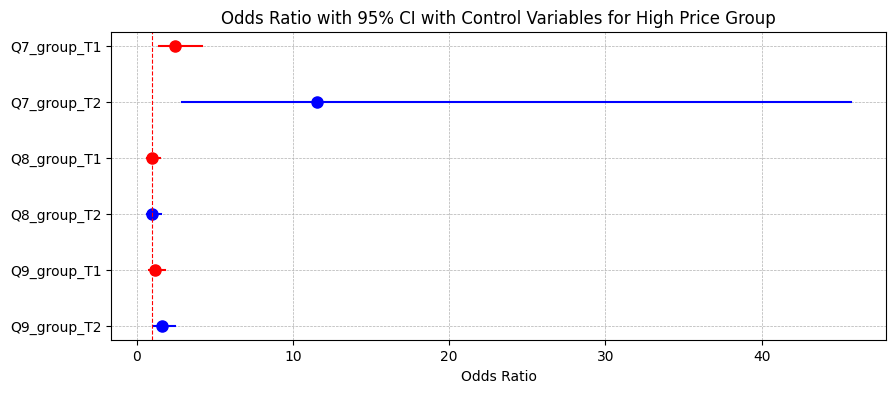

In [ ]:
plt.figure(figsize=(10, 4))

for index, row in df_hig_cov.iterrows():
    if index % 2 == 0:
        color = 'blue'
    else:
        color = 'red'

    plt.plot([row['OR_coef']], [index], marker='o', markersize=8, color=color)
    plt.plot([row['OR_95CI_L'], row['OR_95CI_H']], [index, index], color=color)

plt.yticks(range(len(df_hig_cov)-1, -1, -1), df_hig_cov['Compare'])
plt.xlabel('Odds Ratio')
plt.title('Odds Ratio with 95% CI with Control Variables for High Price Group')
plt.axvline(x=1, linestyle='--', color='red', linewidth=0.8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Combine Data


In [ ]:
columns = ['StartDate', 'EndDate', 'Duration (in seconds)', 'LocationLatitude', 'LocationLongitude', 'country', 'Gender', 'Age', 'Career', 'Monthly Expense']
questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']

df_list = []

for i, q in enumerate(questions, start=2):
    q_columns = columns + [f'{q}', f'{q}_filter', f'{q}_DO_1', f'{q}_DO_2', f'{q}_DO_3', f'{q}_DO_4', f'{q}_DO_5']
    df_temp = df_preprocess[q_columns].copy()
    df_temp.rename(columns={f'{q}': 'choice', f'{q}_filter': 'filter', f'{q}_DO_1': 'DO_1', f'{q}_DO_2': 'DO_2', f'{q}_DO_3': 'DO_3', f'{q}_DO_4': 'DO_4', f'{q}_DO_5': 'DO_5'}, inplace=True)
    df_temp['question'] = q
    df_list.append(df_temp)

df_combined = pd.concat(df_list)

def classify(row):
    if row['DO_3'] == 3:
        return 'control'
    elif row['DO_4'] == 3:
        return 'T1'
    elif row['DO_5'] == 3:
        return 'T2'

df_combined['group'] = df_combined.apply(classify, axis=1)

df_combined.head()

,StartDate,EndDate,Duration (in seconds),LocationLatitude,LocationLongitude,country,Gender,Age,Career,Monthly Expense,choice,filter,DO_1,DO_2,DO_3,DO_4,DO_5,question,group
0,2024-02-27 19:04:41,2024-02-27 19:06:36,115,42.3973,-71.0372,United States of America,Female,18-24 years old,Student,$601~$900,$5-3,3.0,1,2,3,0,0,Q1,control
1,2024-02-27 19:05:40,2024-02-27 19:06:58,78,42.3562,-71.0631,United States of America,Male,18-24 years old,Student,"$1,801~$2,100",$5-2,2.0,1,2,0,0,3,Q1,T2
2,2024-02-27 19:10:43,2024-02-27 19:12:27,103,32.7908,-96.8336,United States of America,Female,25-34 years old,Student,"$1,201~$1,500",6,1.0,2,1,0,3,0,Q1,T1
3,2024-02-27 19:10:24,2024-02-27 19:12:48,143,42.3464,-71.0975,United States of America,Male,18-24 years old,Student,"$2,401~$2,700",$5 $4.75 \n (save 5%),5.0,1,2,0,0,3,Q1,T2
4,2024-02-27 19:13:28,2024-02-27 19:16:12,164,42.2506,-71.1286,United States of America,Female,18-24 years old,Student,"$2,701~$3,000",6,1.0,1,2,0,3,0,Q1,T1


In [ ]:
from scipy import stats
import statsmodels.stats.power as smp

results = []
# Group Cohen's D
def categorize_effect_size(cohen_d):
    if abs(cohen_d) < 0.2:
        return 'Small'
    elif abs(cohen_d) < 0.5:
        return 'Moderate'
    else:
        return 'Large'

# Group power
def categorize_power(power):
    if power < 0.2:
        return 'Low'
    elif power < 0.8:
        return 'Moderate'
    else:
        return 'High'

prop_treatment_one = (df_combined[df_combined['group'] == 'T1']['filter'] == 4).mean()
prop_treatment_two = (df_combined[df_combined['group'] == 'T2']['filter'] == 5).mean()
prop_control = (df_combined[df_combined['group'] == 'control']['filter'] == 3).mean()

# T-tests
t_statistic1, p_value1 = stats.ttest_ind(df_combined[df_combined['group'] == 'T1']['filter'] == 4,
                                          df_combined[df_combined['group'] == 'control']['filter'] == 3)

t_statistic2, p_value2 = stats.ttest_ind(df_combined[df_combined['group'] == 'T2']['filter'] == 5,
                                          df_combined[df_combined['group'] == 'control']['filter'] == 3)

t_statistic3, p_value3 = stats.ttest_ind(df_combined[df_combined['group'] == 'T1']['filter'] == 4,
                                          df_combined[df_combined['group'] == 'T2']['filter'] == 5)

# Cohen's d
cohen_d_t1_vs_control = (prop_treatment_one - prop_control) / np.sqrt((df_combined['filter'] == 4).mean() * (1 - (df_combined['filter'] == 4).mean()) +
                                                                        (df_combined['filter'] == 3).mean() * (1 - (df_combined['filter'] == 3).mean()))

cohen_d_t2_vs_control = (prop_treatment_two - prop_control) / np.sqrt((df_combined['filter'] == 5).mean() * (1 - (df_combined['filter'] == 5).mean()) +
                                                                      (df_combined['filter'] == 3).mean() * (1 - (df_combined['filter'] == 3).mean()))

cohen_d_t1_vs_t2 = (prop_treatment_one - prop_treatment_two) / np.sqrt((df_combined['filter'] == 4).mean() * (1 - (df_combined['filter'] == 4).mean()) +
                                                                       (df_combined['filter'] == 5).mean() * (1 - (df_combined['filter'] == 5).mean()))

# Power
power_t1_vs_control = smp.tt_ind_solve_power(effect_size=cohen_d_t1_vs_control, nobs1=len(df_combined[df_combined['group'] == 'T1']),
                                             alpha=0.05, ratio=len(df_combined[df_combined['group'] == 'control']) / len(df_combined[df_combined['group'] == 'T1']), alternative='two-sided')

power_t2_vs_control = smp.tt_ind_solve_power(effect_size=cohen_d_t2_vs_control, nobs1=len(df_combined[df_combined['group'] == 'T2']),
                                             alpha=0.05, ratio=len(df_combined[df_combined['group'] == 'control']) / len(df_combined[df_combined['group'] == 'T2']), alternative='two-sided')

power_t1_vs_t2 = smp.tt_ind_solve_power(effect_size=cohen_d_t1_vs_t2, nobs1=len(df_combined[df_combined['group'] == 'T1']),
                                        alpha=0.05, ratio=len(df_combined[df_combined['group'] == 'T2']) / len(df_combined[df_combined['group'] == 'T1']), alternative='two-sided')

# Group Cohen's D and power
category_t1_vs_control = categorize_effect_size(cohen_d_t1_vs_control)
category_t2_vs_control = categorize_effect_size(cohen_d_t2_vs_control)
category_t1_vs_t2 = categorize_effect_size(cohen_d_t1_vs_t2)

category_power_t1_vs_control = categorize_power(power_t1_vs_control)
category_power_t2_vs_control = categorize_power(power_t2_vs_control)
category_power_t1_vs_t2 = categorize_power(power_t1_vs_t2)

# Append results to the list
results.append({
    'Question': 'All',
    'T1 vs Control T-test': round(t_statistic1, 3),
    'T1 vs Control P-value': round(p_value1, 5),
    'T1 vs Control Significance': "Significant" if p_value1 < 0.05 else "Not significant",
#    'T1 vs Control Cohens d': round(cohen_d_t1_vs_control, 6),
#    'T1 vs Control Cohens d Significance': category_t1_vs_control,
#    'T1 vs Control Power': round(power_t1_vs_control, 3),
#    'T1 vs Control Power Significance': category_power_t1_vs_control,
    'T2 vs Control T-test': round(t_statistic2, 3),
    'T2 vs Control P-value': round(p_value2, 5),
    'T2 vs Control Significance': "Significant" if p_value2 < 0.05 else "Not significant",
#    'T2 vs Control Cohens d': round(cohen_d_t2_vs_control, 6),
#    'T2 vs Control Cohens d Significance': category_t2_vs_control,
#    'T2 vs Control Power': round(power_t2_vs_control, 3),
#    'T2 vs Control Power Significance': category_power_t2_vs_control,
    'T1 vs T2 T-test': round(t_statistic3, 3),
    'T1 vs T2 P-value': round(p_value3, 5),
    'T1 vs T2 Significance': "Significant" if p_value3 < 0.05 else "Not significant",
#    'T1 vs T2 Cohens d': round(cohen_d_t1_vs_t2, 6),
#    'T1 vs T2 Cohens d Significance': category_t1_vs_t2,
#    'T1 vs T2 Power': round(power_t1_vs_t2, 3),
#    'T1 vs T2 Power Significance': category_power_t1_vs_t2
})

# Create DataFrame from results
results_df = pd.DataFrame(results)

results_df


,Question,T1 vs Control T-test,T1 vs Control P-value,T1 vs Control Significance,T2 vs Control T-test,T2 vs Control P-value,T2 vs Control Significance,T1 vs T2 T-test,T1 vs T2 P-value,T1 vs T2 Significance
0,All,6.757,0.0,Significant,6.389,0.0,Significant,0.352,0.7249,Not significant


In [ ]:
df_grouped_regression = df_combined.copy()

# ppl who reside most in 'Taiwan', 'USA', 'China', other place's like hong kong, japan are less, so we merge other country into 'others' category
df_grouped_regression['country_grouped'] =  df_grouped_regression['country'].apply(lambda x: x if x in ['Taiwan', "United States of America", 'China'] else 'others')

# Gender
df_grouped_regression['gender_grouped'] = df_grouped_regression['Gender']
df_grouped_regression['gender_grouped'].drop(df_grouped_regression[df_grouped_regression['gender_grouped']=='Genderqueer'].index, axis=0, inplace=True)

# Career
df_grouped_regression['Career'] =  df_grouped_regression['Career'].apply(lambda x: x if x in ['Student','Information Technology (IT) and Telecommunications','Education'] else 'Others')

# Monthly  expense
def merge_expense_ranges(expense_range):
    if expense_range in ['$0~$300', '$301~$600','$601~$900', '$901~$1,200']:
        return 'Under $1,200'
    elif expense_range in ['$1,201~$1,500', '$1,501~$1,800','$1,801~$2,100', '$2,101~$2,400']:
        return '$1,201~$2,400'
    elif expense_range in ['$2,401~$2,700', '$2,701~$3,000','Above $3,000']:
        return 'Above $2,401'
df_grouped_regression['monthly_expense_grouped'] = df_grouped_regression['Monthly Expense'].apply(merge_expense_ranges)

df_grouped_regression

,StartDate,EndDate,Duration (in seconds),LocationLatitude,LocationLongitude,country,Gender,Age,Career,Monthly Expense,...,DO_1,DO_2,DO_3,DO_4,DO_5,question,group,country_grouped,gender_grouped,monthly_expense_grouped
0,2024-02-27 19:04:41,2024-02-27 19:06:36,115,42.3973,-71.0372,United States of America,Female,18-24 years old,Student,$601~$900,...,1,2,3,0,0,Q1,control,United States of America,Female,"Under $1,200"
1,2024-02-27 19:05:40,2024-02-27 19:06:58,78,42.3562,-71.0631,United States of America,Male,18-24 years old,Student,"$1,801~$2,100",...,1,2,0,0,3,Q1,T2,United States of America,Male,"$1,201~$2,400"
2,2024-02-27 19:10:43,2024-02-27 19:12:27,103,32.7908,-96.8336,United States of America,Female,25-34 years old,Student,"$1,201~$1,500",...,2,1,0,3,0,Q1,T1,United States of America,Female,"$1,201~$2,400"
3,2024-02-27 19:10:24,2024-02-27 19:12:48,143,42.3464,-71.0975,United States of America,Male,18-24 years old,Student,"$2,401~$2,700",...,1,2,0,0,3,Q1,T2,United States of America,Male,"Above $2,401"
4,2024-02-27 19:13:28,2024-02-27 19:16:12,164,42.2506,-71.1286,United States of America,Female,18-24 years old,Student,"$2,701~$3,000",...,1,2,0,3,0,Q1,T1,United States of America,Female,"Above $2,401"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2024-02-29 11:09:30,2024-03-01 00:16:40,47229,22.9917,120.2148,Taiwan,Female,25-34 years old,Education,$601~$900,...,2,1,0,3,0,Q9,T1,Taiwan,Female,"Under $1,200"
161,2024-03-03 04:00:18,2024-03-03 04:02:51,153,25.0504,121.5324,Taiwan,Female,25-34 years old,Others,$601~$900,...,1,2,0,0,3,Q9,T2,Taiwan,Female,"Under $1,200"
162,2024-03-04 07:39:42,2024-03-04 07:44:06,263,24.1440,120.6844,Taiwan,Female,18-24 years old,Others,$0~$300,...,2,1,3,0,0,Q9,control,Taiwan,Female,"Under $1,200"
163,2024-03-04 09:07:43,2024-03-04 09:10:53,189,25.0504,121.5324,Taiwan,Female,18-24 years old,Student,"Above $3,000",...,2,1,3,0,0,Q9,control,Taiwan,Female,"Above $2,401"


In [ ]:
!pip install stargazer
from stargazer.stargazer import Stargazer

In [ ]:
# without control
df_grouped_regression[filter_recoded_col] = df_grouped_regression['filter'].replace({3: 3, 4: 3, 5: 3})
df_grouped_regression[filter_recoded_col] = pd.Categorical(df_grouped_regression[filter_recoded_col])

# Convert group column to categorical variable
df_grouped_regression[group_col] = pd.Categorical(df_grouped_regression['group'])

# Create design matrices for the model
endog = pd.get_dummies(df_grouped_regression[filter_recoded_col], prefix=f'{filter_recoded_col}')
exog = sm.add_constant(pd.get_dummies(df_grouped_regression[group_col], prefix=f'{group_col}'))

# Ensure that 'group_T1' and 'group_T2' columns exist in the exog dataframe
if 'group_T1' in exog.columns and 'group_T2' in exog.columns:
    exog = exog[['group_T1', 'group_T2']]

# Flatten the endog array
endog = endog.idxmax(axis=1)

# Multinomial logistic regression using statsmodxels
mnlogit_model = sm.MNLogit(endog, exog)
result = mnlogit_model.fit()

print(f"Results for {'filter'}:")
print(result.summary())

In [ ]:
# with control

df_grouped_regression[filter_recoded_col] = df_grouped_regression['filter'].replace({3: 3, 4: 3, 5: 3})
df_grouped_regression[filter_recoded_col] = pd.Categorical(df_grouped_regression[filter_recoded_col])

# Convert group column to categorical variable
df_grouped_regression[group_col] = pd.Categorical(df_grouped_regression['group'])

# Create design matrices for the model
endog = pd.get_dummies(df_grouped_regression[filter_recoded_col], prefix=f'{filter_recoded_col}')
exog = sm.add_constant(pd.get_dummies(df_grouped_regression[group_col], prefix=f'{group_col}'))

# Ensure that 'group_T1' and 'group_T2' columns exist in the exog dataframe
if 'group_T1' in exog.columns and 'group_T2' in exog.columns:
    exog = exog[['group_T1', 'group_T2']]

# Add covariates to the exog matrix
exog = pd.concat([exog,
                 pd.get_dummies(df_grouped_regression['monthly_expense_grouped'], prefix='monthly_expense'),
                 pd.get_dummies(df_grouped_regression['country_grouped'], prefix='country'),
                 pd.get_dummies(df_grouped_regression['gender_grouped'], prefix='gender'),
                 pd.get_dummies(df_grouped_regression['Career'], prefix='career')],
                 axis=1)

# Flatten the endog array
endog = endog.idxmax(axis=1)

# Multinomial logistic regression using statsmodels
mnlogit_model = sm.MNLogit(endog, exog)
result = mnlogit_model.fit()

print(f"Results for {'filter'}:")
print(result.summary())

         Current function value: 0.974958
         Iterations: 35
Results for Q6_filter:
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  165
Model:                        MNLogit   Df Residuals:                      143
Method:                           MLE   Df Model:                           20
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                 0.09810
Time:                        03:46:58   Log-Likelihood:                -160.87
converged:                      False   LL-Null:                       -178.36
Covariance Type:            nonrobust   LLR p-value:                   0.02014
                                  y=Q6_filter_recoded_2.0       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Q6_group_T1                